<a href="https://colab.research.google.com/github/leticiasdrummond/Notebooks_IT306/blob/main/13_de_IT306_atividade1_PVlib_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IT306 - Energia Solar Fotovoltaica 2.2025

Grupo:
*   Rafael Cesar Veronez Oleto  **RA:299011**
*   Luciano Cardoso Ferreira Filho **RA:240276**
*   Rafael Cristian Nascimento **RA:223622**


ID da estação solarimetrica : **UNLV**                                                                                                                                                             

https://solarstations.org/station_network_midc.html

Função do PVLIB: **pvlib.iotools.read_midc_raw_data_from_nrel**

##importar as biblotecas do **PVLIB**

In [289]:
!pip install pvlib

In [290]:
import pvlib
from pvlib import location
from pvlib import pvsystem
from pvlib import tools
from pvlib.pvsystem import retrieve_sam
import folium
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.constants import Boltzmann, elementary_charge
import numpy as np
from pvlib import irradiance
from pvlib.iam import physical



---



---





---



---



##***LOCALIZAÇÃO*** - definindo latitude, longitude,

In [291]:
# --------------------------------------------
# 1) Definições do local e horário
# --------------------------------------------
Latitude = 32.22969
Longitude = -110.95534
Altitude = 786
tz= 'Etc/GMT-7'
# Criar um mapa interativo centralizado na localização
import folium
mapa = folium.Map(
    location=[Latitude, Longitude],
    zoom_start=12,
    tiles='OpenStreetMap'  # Tipo de mapa
)

# Adicionar um marcador no mapa
folium.Marker(
    [Latitude, Longitude],
    popup="Localização selecionada",
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(mapa)

# Exibir o mapa
mapa

# Importando dados da estação solarimetrica **#Universidade de UATs**

In [292]:
#Import Data
#Localização da Uat

df_weather = pvlib.iotools.read_midc_raw_data_from_nrel('UAT',               # ID da estação
                                                    pd.Timestamp('20190101'),   # data de inicio YYYYMMDD
                                                    pd.Timestamp('20211231'))   # data de termino  YYYYMMDD

df_weather.head(100)

Unnamed: 0  Year  DOY  MST  Direct Normal [W/m^2]  \
2019-01-01 00:00:00-07:00           0  2019    1    0                  -0.43   
2019-01-01 00:01:00-07:00           0  2019    1    1                  -0.29   
2019-01-01 00:02:00-07:00           0  2019    1    2                  -0.39   
2019-01-01 00:03:00-07:00           0  2019    1    3                  -0.07   
2019-01-01 00:04:00-07:00           0  2019    1    4                   0.01   
...                               ...   ...  ...  ...                    ...   
2019-01-01 01:35:00-07:00           0  2019    1  135                   0.12   
2019-01-01 01:36:00-07:00           0  2019    1  136                  -0.43   
2019-01-01 01:37:00-07:00           0  2019    1  137                  -0.42   
2019-01-01 01:38:00-07:00           0  2019    1  138                   0.03   
2019-01-01 01:39:00-07:00           0  2019    1  139                   0.32   

                           Diffuse Horiz [W/m^2]  \
2019-01-01 00:00:00-07:00                   0.00   
2019-01-01 00:01:00-07:00                   0.00   
2019-01-01 00:02:00-07:00                   0.00   
2019-01-01 00:03:00-07:00                   0.00   
2019-01-01 00:04:00-07:00                   0.00   
...                                          ...   
2019-01-01 01:35:00-07:00                   0.00   
2019-01-01 01:36:00-07:00                   0.00   
2019-01-01 01:37:00-07:00                   0.00   
2019-01-01 01:38:00-07:00                   0.00   
2019-01-01 01:39:00-07:00                   0.00   

                           Global Horiz (tracker) [W/m^2]  \
2019-01-01 00:00:00-07:00                           -1.04   
2019-01-01 00:01:00-07:00                           -1.11   
2019-01-01 00:02:00-07:00                           -1.11   
2019-01-01 00:03:00-07:00                           -1.13   
2019-01-01 00:04:00-07:00                           -1.16   
...                                                   ...   
2019-01-01 01:35:00-07:00                           -0.96   
2019-01-01 01:36:00-07:00                           -1.05   
2019-01-01 01:37:00-07:00                           -1.09   
2019-01-01 01:38:00-07:00                           -1.12   
2019-01-01 01:39:00-07:00                           -1.11   

                           Global Horiz (platform) [W/m^2]  Temp CHP1 [deg C]  \
2019-01-01 00:00:00-07:00                            -1.37            -246.80   
2019-01-01 00:01:00-07:00                            -1.37            -246.80   
2019-01-01 00:02:00-07:00                            -1.37            -246.80   
2019-01-01 00:03:00-07:00                            -1.38            -246.80   
2019-01-01 00:04:00-07:00                            -1.38            -246.80   
...                                                    ...                ...   
2019-01-01 01:35:00-07:00                            -1.62            -246.80   
2019-01-01 01:36:00-07:00                            -1.66            -246.80   
2019-01-01 01:37:00-07:00                            -1.68            -246.80   
2019-01-01 01:38:00-07:00                            -1.63            -246.80   
2019-01-01 01:39:00-07:00                            -1.62            -246.80   

                           Temp CM22 (tracker) [deg C]  ...  \
2019-01-01 00:00:00-07:00                      -246.80  ...   
2019-01-01 00:01:00-07:00                      -246.80  ...   
2019-01-01 00:02:00-07:00                      -246.80  ...   
2019-01-01 00:03:00-07:00                      -246.80  ...   
2019-01-01 00:04:00-07:00                      -246.80  ...   
...                                                ...  ...   
2019-01-01 01:35:00-07:00                      -246.80  ...   
2019-01-01 01:36:00-07:00                      -246.80  ...   
2019-01-01 01:37:00-07:00                      -246.80  ...   
2019-01-01 01:38:00-07:00                      -246.80  ...   
2019-01-01 01:39:00-07:00                 

In [293]:
df_weather.keys()

Index(['Unnamed: 0', 'Year', 'DOY', 'MST', 'Direct Normal [W/m^2]',
       'Diffuse Horiz [W/m^2]', 'Global Horiz (tracker) [W/m^2]',
       'Global Horiz (platform) [W/m^2]', 'Temp CHP1 [deg C]',
       'Temp CM22 (tracker) [deg C]', 'Temp CM22 (platform) [deg C]',
       'CR1000 Temp [deg C]', 'CR1000 Battery [VDC]',
       'Air Temperature [deg C]', 'Rel Humidity [%]',
       'Station Pressure [mBar]', 'Avg Wind Speed @ 3m [m/s]',
       'Avg Wind Direction @ 3m [deg from N]', 'Peak Wind Speed @ 3m [m/s]',
       'Zenith Angle [degrees]', 'Azimuth Angle [degrees]'],
      dtype='object')

Aplicando a função resample para converter os dados de 1 em 1 minuto para dados horários e atribuindo à uma nova variável

In [294]:
df_weather.Diario = ['ghi', 'dhi', 'dni']
df_weather_horário = df_weather.resample('H').mean()

/tmp/ipython-input-3734399401.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_weather.Diario = ['ghi', 'dhi', 'dni']
/tmp/ipython-input-3734399401.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_weather_horário = df_weather.resample('H').mean()


Convertendo de dados horários para diários

In [295]:
df_weather_horário['ghi'].resample('D').sum().plot(figsize=(20,6))

KeyError: 'ghi'

# Importando dados satelite **PVGIS**

In [296]:
start = 2019
end = 2021

pvgis_dataset_ghi_3Y, metadata2021 = pvlib.iotools.get_pvgis_hourly(latitude, longitude, start, end,
                               raddatabase='PVGIS-ERA5', components=False, surface_tilt=0,
                               surface_azimuth=0, outputformat='json', usehorizon=True,
                               userhorizon=None, pvcalculation=False, peakpower=None,
                               pvtechchoice='crystSi', mountingplace='free', loss=0,
                               trackingtype=0, optimal_surface_tilt=False, optimalangles=False,
                               url='https://re.jrc.ec.europa.eu/api/', map_variables=True, timeout=30)

In [297]:
pvgis_dataset_ghi_3Y

poa_global  solar_elevation  temp_air  wind_speed  \
time                                                                           
2019-01-01 00:30:00+00:00        8.55             0.32      7.56        4.07   
2019-01-01 01:30:00+00:00        0.00             0.00      6.71        3.24   
2019-01-01 02:30:00+00:00        0.00             0.00      5.79        3.10   
2019-01-01 03:30:00+00:00        0.00             0.00      4.74        2.83   
2019-01-01 04:30:00+00:00        0.00             0.00      3.41        2.48   
...                               ...              ...       ...         ...   
2021-12-31 19:30:00+00:00      433.09            30.70     11.91        3.59   
2021-12-31 20:30:00+00:00      444.74            29.77     12.93        3.79   
2021-12-31 21:30:00+00:00      368.69            25.65     13.40        4.00   
2021-12-31 22:30:00+00:00      368.69            18.91     13.32        4.14   
2021-12-31 23:30:00+00:00        0.00             0.00     12.68        4.48   

                           Int  
time                            
2019-01-01 00:30:00+00:00    0  
2019-01-01 01:30:00+00:00    0  
2019-01-01 02:30:00+00:00    0  
2019-01-01 03:30:00+00:00    0  
2019-01-01 04:30:00+00:00    0  
...                        ...  
2021-12-31 19:30:00+00:00    0  
2021-12-31 20:30:00+00:00    0  
2021-12-31 21:30:00+00:00    0  
2021-12-31 22:30:00+00:00    0  
2021-12-31 23:30:00+00:00    0  

[26304 rows x 5 columns]

# Importando dados satelite **NSRDB**

In [298]:
# Importando Dados de Satélite da NSRDB - É preciso solicitar a chave de API no site https://developer.nrel.gov/signup/
# Os dados de satélite já vem em resolução horária. Portando, para a conversão de dados horários para diários, basta aplicar a função resample('D').sum() como feito acima.
email = 'r299011@dac.unicamp.br'
api_key = '4s9h0h7ScaQ8gxJWelBoBOi0qHgFkDzyOSBM2TSh'  # substitua pela sua chave de API
year = 2019

nsrdb_data_2019, metadata4 = pvlib.iotools.get_nsrdb_psm4_full_disc(latitude, longitude, api_key, email, year, time_step=60,
                                                              parameters=('air_temperature', 'dew_point', 'dhi', 'dni', 'ghi', 'surface_albedo', 'surface_pressure', 'wind_direction', 'wind_speed'),
                                                              leap_day=True, full_name='pvlib python', affiliation='pvlib python', utc=True, map_variables=True, url=None, timeout=30)

In [299]:
# Importando Dados de Satélite da NSRDB - É preciso solicitar a chave de API no site https://developer.nrel.gov/signup/
# Os dados de satélite já vem em resolução horária. Portando, para a conversão de dados horários para diários, basta aplicar a função resample('D').sum() como feito acima.
email = 'r299011@dac.unicamp.br'
api_key = '4s9h0h7ScaQ8gxJWelBoBOi0qHgFkDzyOSBM2TSh'  # substitua pela sua chave de API
year = 2020

nsrdb_data_2020, metadata4 = pvlib.iotools.get_nsrdb_psm4_full_disc(latitude, longitude, api_key, email, year, time_step=60,
                                                              parameters=('air_temperature', 'dew_point', 'dhi', 'dni', 'ghi', 'surface_albedo', 'surface_pressure', 'wind_direction', 'wind_speed'),
                                                              leap_day=True, full_name='pvlib python', affiliation='pvlib python', utc=True, map_variables=True, url=None, timeout=30)


In [300]:
# Importando Dados de Satélite da NSRDB - É preciso solicitar a chave de API no site https://developer.nrel.gov/signup/
# Os dados de satélite já vem em resolução horária. Portando, para a conversão de dados horários para diários, basta aplicar a função resample('D').sum() como feito acima.
email = 'r299011@dac.unicamp.br'
api_key = '4s9h0h7ScaQ8gxJWelBoBOi0qHgFkDzyOSBM2TSh'  # substitua pela sua chave de API
year = 2021

nsrdb_data_2021, metadata4 = pvlib.iotools.get_nsrdb_psm4_full_disc(latitude, longitude, api_key, email, year, time_step=60,
                                                              parameters=('air_temperature', 'dew_point', 'dhi', 'dni', 'ghi', 'surface_albedo', 'surface_pressure', 'wind_direction', 'wind_speed'),
                                                              leap_day=True, full_name='pvlib python', affiliation='pvlib python', utc=True, map_variables=True, url=None, timeout=30)

In [301]:
nsrdb_data_3Y = nsrdb_data_3Y = pd.concat([nsrdb_data_2019, nsrdb_data_2020, nsrdb_data_2021], axis=0)

In [302]:
nsrdb_data_3Y

Year  Month  Day  Hour  Minute  temp_air  temp_dew  \
2019-01-01 00:00:00+00:00  2019      1    1     0       0      4.30    -11.50   
2019-01-01 01:00:00+00:00  2019      1    1     1       0      2.60    -10.70   
2019-01-01 02:00:00+00:00  2019      1    1     2       0      2.40    -10.30   
2019-01-01 03:00:00+00:00  2019      1    1     3       0      1.80    -10.50   
2019-01-01 04:00:00+00:00  2019      1    1     4       0      0.80    -11.30   
...                         ...    ...  ...   ...     ...       ...       ...   
2021-12-31 19:00:00+00:00  2021     12   31    19       0     13.60      4.10   
2021-12-31 20:00:00+00:00  2021     12   31    20       0     14.10      3.20   
2021-12-31 21:00:00+00:00  2021     12   31    21       0     14.20      2.60   
2021-12-31 22:00:00+00:00  2021     12   31    22       0     13.90      2.00   
2021-12-31 23:00:00+00:00  2021     12   31    23       0     12.80      1.90   

                            dhi    dni    ghi  albedo  pressure  \
2019-01-01 00:00:00+00:00 36.00   0.00  36.00    0.18    936.00   
2019-01-01 01:00:00+00:00  0.00   0.00   0.00    0.18    937.00   
2019-01-01 02:00:00+00:00  0.00   0.00   0.00    0.18    938.00   
2019-01-01 03:00:00+00:00  0.00   0.00   0.00    0.18    938.00   
2019-01-01 04:00:00+00:00  0.00   0.00   0.00    0.18    939.00   
...                         ...    ...    ...     ...       ...   
2021-12-31 19:00:00+00:00 73.00 900.00 523.00    0.17    928.00   
2021-12-31 20:00:00+00:00 81.00   1.00  81.00    0.17    927.00   
2021-12-31 21:00:00+00:00 34.00   0.00  34.00    0.17    926.00   
2021-12-31 22:00:00+00:00 85.00   0.00  85.00    0.17    926.00   
2021-12-31 23:00:00+00:00 55.00 711.00 238.00    0.17    925.00   

                           wind_direction  wind_speed  
2019-01-01 00:00:00+00:00           28.00        2.20  
2019-01-01 01:00:00+00:00           34.00        1.70  
2019-01-01 02:00:00+00:00           35.00        1.60  
2019-01-01 03:00:00+00:00           33.00        1.60  
2019-01-01 04:00:00+00:00           27.00        1.90  
...                                   ...         ...  
2021-12-31 19:00:00+00:00          236.00        5.80  
2021-12-31 20:00:00+00:00          241.00        5.60  
2021-12-31 21:00:00+00:00          245.00        5.10  
2021-12-31 22:00:00+00:00          245.00        4.60  
2021-12-31 23:00:00+00:00          246.00        3.40  

[26304 rows x 14 columns]

# Comparativo GHI, DNI, DHI

**GHI** - (Global Horizontal Irradiance)
**DNI** - (Direct Normal Irradiance)
**DHI** - (Diffuse Horizontal Irradiance)

KeyError: 'ghi'

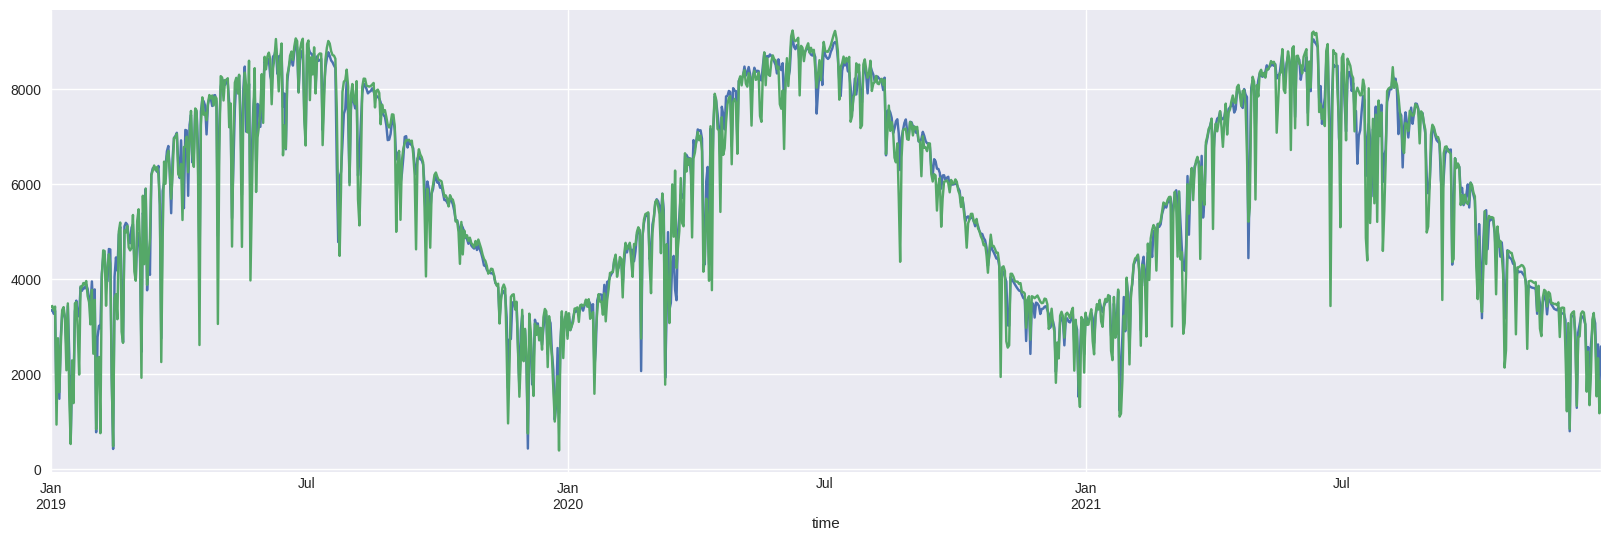

In [303]:
#GHI
pvgis_dataset_ghi_3Y['poa_global'].resample('D').sum().plot(figsize=(20,6))
nsrdb_data_3Y['ghi'].resample('D').sum().plot(figsize=(20,6))
df_weather_horário['ghi'].resample('D').sum().plot(figsize=(20,6))
plt.legend(['PVGIS-ERA5', 'NSRDB', 'Medições em campo'])
plt.title('Comparativo de Irradiância Global Horizontal Diária (GHI)- 2021')
plt.ylabel('Irradiância Global Horizontal  Diária (Wh/m²)')
plt.xlabel('Data')
plt.grid()
plt.show()

#DNI
pvgis_dataset_ghi_3Y['poa_global'].resample('D').sum().plot(figsize=(20,6))
nsrdb_data_3Y['dni'].resample('D').sum().plot(figsize=(20,6))
df_weather_horário['dni'].resample('D').sum().plot(figsize=(20,6))
plt.legend(['PVGIS-ERA5', 'NSRDB', 'Medições em campo'])
plt.title('Comparativo de Irradiância Directa Norma Diária (DNI) - 2021')
plt.ylabel('Irradiância Directa Normal (Wh/m²)')
plt.xlabel('Data')
plt.grid()
plt.show()


#DHI
pvgis_dataset_ghi_3Y['poa_global'].resample('D').sum().plot(figsize=(20,6))
nsrdb_data_3Y['dhi'].resample('D').sum().plot(figsize=(20,6))
df_weather_horário['dhi'].resample('D').sum().plot(figsize=(20,6))
plt.legend(['PVGIS-ERA5', 'NSRDB', 'Medições em campo'])
plt.title('Comparativo de Irradiância Difusa Horizontal Diária (DHI)- 2019 - 2021')
plt.ylabel('Irradiância Difusa Horizontal (Wh/m²)')
plt.xlabel('Data')
plt.grid()
plt.show()

# **Comparativo** de Dados de **Satélite** com Dados **Medidos** em Campo **GHI,DNI,DHI**

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#GHI
# Dados dos modelos
models = {
    'PVGIS': pvgis_dataset_ghi_3Y['poa_global'].resample('D').sum(),
    'NSRDB': nsrdb_data_3Y['ghi'].resample('D').sum()
}

# Dados medidos
measured = df_weather_horário['ghi'].resample('D').sum()

# 2. Cálculo das métricas
metrics = pd.DataFrame(columns=['RMSE (W/m²)', 'MAE (W/m²)', 'R²', 'Bias (W/m²)', 'Energia Total (Wh/m²)'])

for name, model in models.items():
    y_true = measured
    y_pred = model

    metrics.loc[name] = {
        'RMSE (W/m²)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE (W/m²)': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred),
        'Bias (W/m²)': np.mean(y_pred - y_true),
        'Energia Total (Wh/m²)': model.sum()
    }

# Adicionando dados medidos
metrics.loc['Dados Medidos'] = {
    'RMSE (W/m²)': np.nan,
    'MAE (W/m²)': np.nan,
    'R²': np.nan,
    'Bias (W/m²)': np.nan,
    'Energia Total (Wh/m²)': measured.sum()
}

# 3. Exibição das métricas com formatação
pd.set_option('display.float_format', '{:.2f}'.format)
print("\n=== Métricas de Desempenho ghi 3 anos ===")
print(metrics)
###################################______________________________________####################################################
#DNI
# Dados dos modelos
models = {
    'PVGIS': pvgis_dataset_ghi_3Y['poa_global'].resample('D').sum(),
    'NSRDB': nsrdb_data_3Y['dni'].resample('D').sum()
}

# Dados medidos
measured = df_weather_horário['dni'].resample('D').sum()

# 2. Cálculo das métricas
metrics = pd.DataFrame(columns=['RMSE (W/m²)', 'MAE (W/m²)', 'R²', 'Bias (W/m²)', 'Energia Total (Wh/m²)'])

for name, model in models.items():
    y_true = measured
    y_pred = model

    metrics.loc[name] = {
        'RMSE (W/m²)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE (W/m²)': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred),
        'Bias (W/m²)': np.mean(y_pred - y_true),
        'Energia Total (Wh/m²)': model.sum()
    }

# Adicionando dados medidos
metrics.loc['Dados Medidos'] = {
    'RMSE (W/m²)': np.nan,
    'MAE (W/m²)': np.nan,
    'R²': np.nan,
    'Bias (W/m²)': np.nan,
    'Energia Total (Wh/m²)': measured.sum()
}

# 3. Exibição das métricas com formatação
pd.set_option('display.float_format', '{:.2f}'.format)
print("\n=== Métricas de Desempenho dni 3 anos ===")
print(metrics)
###################################______________________________________####################################################
#DHI
# Dados dos modelos
models = {
    'PVGIS': pvgis_dataset_ghi_3Y['poa_global'].resample('D').sum(),
    'NSRDB': nsrdb_data_3Y['dhi'].resample('D').sum()
}

# Dados medidos
measured = df_weather_horário['dhi'].resample('D').sum()

# 2. Cálculo das métricas
metrics = pd.DataFrame(columns=['RMSE (W/m²)', 'MAE (W/m²)', 'R²', 'Bias (W/m²)', 'Energia Total (Wh/m²)'])

for name, model in models.items():
    y_true = measured
    y_pred = model

    metrics.loc[name] = {
        'RMSE (W/m²)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE (W/m²)': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred),
        'Bias (W/m²)': np.mean(y_pred - y_true),
        'Energia Total (Wh/m²)': model.sum()
    }

# Adicionando dados medidos
metrics.loc['Dados Medidos'] = {
    'RMSE (W/m²)': np.nan,
    'MAE (W/m²)': np.nan,
    'R²': np.nan,
    'Bias (W/m²)': np.nan,
    'Energia Total (Wh/m²)': measured.sum()
}

# 3. Exibição das métricas com formatação
pd.set_option('display.float_format', '{:.2f}'.format)
print("\n=== Métricas de Desempenho dhi 3 anos ===")
print(metrics)

KeyError: 'ghi'

**pela analise grafica e fazendo o comparativo com metrica para os 3 anos o melhor seria o NSRDB Scan por serem mais proximos a medida real em campo, seram usados em modelagens de geração**

Logo após selecionar o dataset (NSRDB ou PVGIS), plotar os seguintes gráficos:                                                                                 
▪ Fração Difusa (DHI / GHI) vs Kt (GHI / (H0*cos (θz)));: Este grafico representa como a propoção de variação difusa varia com a "limpeza do ceu representado por KT                                                                                           
▪ Componentes do Recurso Solar na Horizontal vs Zenith;                                                                         

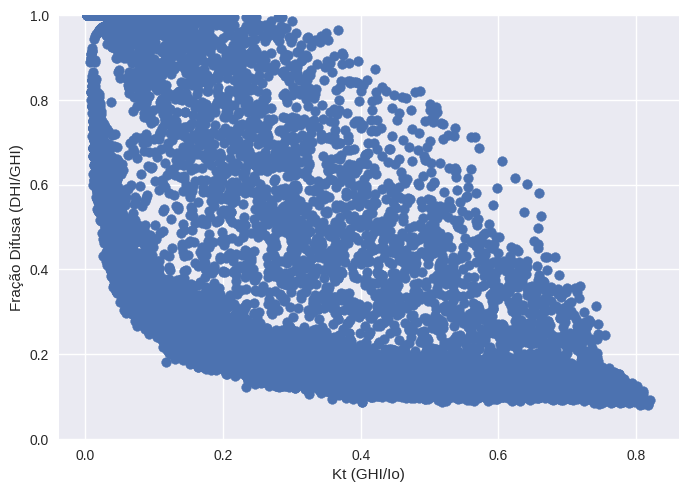

In [368]:
# Kt x Diffuse Fraction


dni_extra = pvlib.irradiance.get_extra_radiation(nsrdb_data_3Y.index)



Kt = nsrdb_data_3Y['ghi']/dni_extra

diff_fraction = nsrdb_data_3Y['dhi']/nsrdb_data_3Y['ghi']

plt.scatter(Kt, diff_fraction)
plt.ylim(0, 1)
plt.xlabel('Kt (GHI/Io)')
plt.ylabel('Fração Difusa (DHI/GHI)')
plt.show()

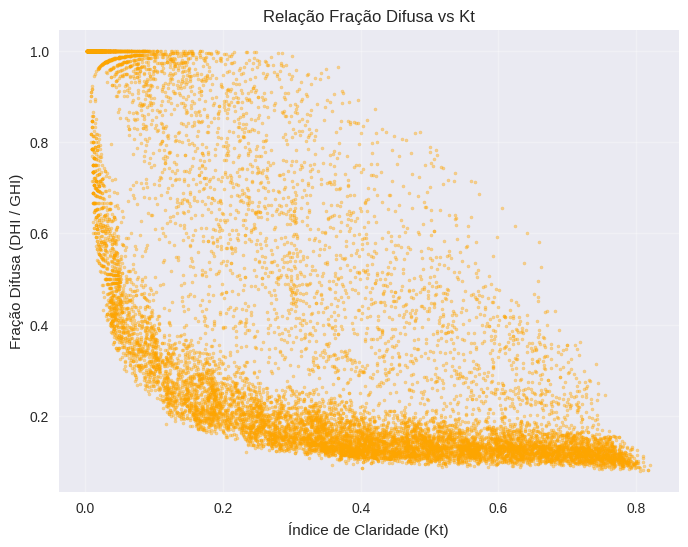

In [369]:
plt.figure(figsize=(8,6))
plt.scatter(Kt, diff_fraction, s=5, alpha=0.4, color='orange')
plt.xlabel('Índice de Claridade (Kt)')
plt.ylabel('Fração Difusa (DHI / GHI)')
plt.title('Relação Fração Difusa vs Kt')
plt.grid(True, alpha=0.3)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


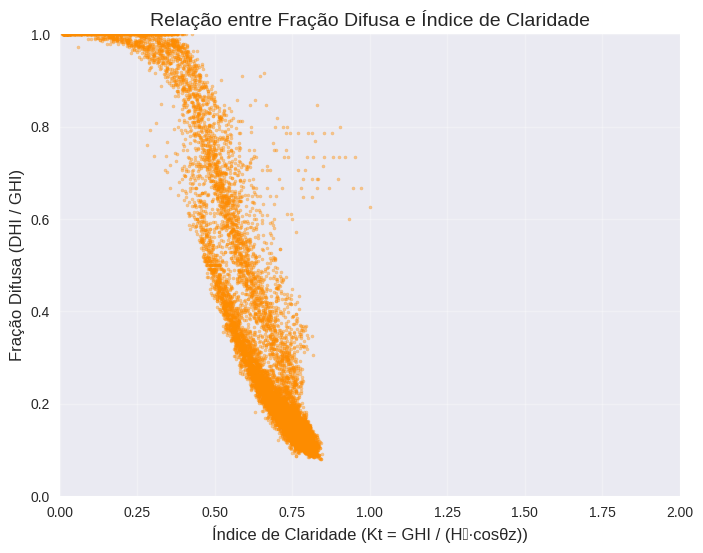

In [370]:
# --- Cálculo do índice de claridade Kt (corrigido) ---
# Extraterrestrial irradiance (W/m²)
dni_extra = pvlib.irradiance.get_extra_radiation(nsrdb_data_3Y.index)

# Ângulo zenital solar (°)
solar_position = pvlib.solarposition.get_solarposition(
    nsrdb_data_3Y.index, latitude, longitude
)
theta_z = solar_position['zenith']

# Índice de claridade (Kt)
Kt = nsrdb_data_3Y['ghi'] / (dni_extra * np.cos(np.radians(theta_z)))
Kt = Kt.replace([np.inf, -np.inf], np.nan).clip(0, 2)

# Fração difusa
diff_fraction = nsrdb_data_3Y['dhi'] / nsrdb_data_3Y['ghi']
diff_fraction = diff_fraction.replace([np.inf, -np.inf], np.nan).clip(0, 1)

# --- Gráfico ---
plt.figure(figsize=(8,6))
plt.scatter(Kt, diff_fraction, s=5, alpha=0.4, color='darkorange')
plt.xlabel('Índice de Claridade (Kt = GHI / (H₀·cosθz))', fontsize=12)
plt.ylabel('Fração Difusa (DHI / GHI)', fontsize=12)
plt.title('Relação entre Fração Difusa e Índice de Claridade', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0,1)
plt.xlim(0,2)
plt.show()

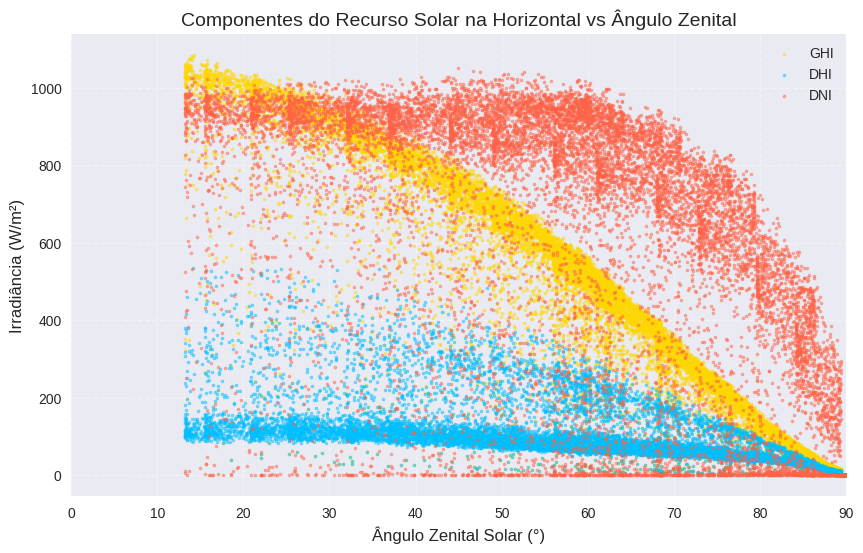

In [371]:
# --- Gráfico das componentes em função do ângulo zenital ---

plt.figure(figsize=(10,6))
plt.scatter(theta_z, nsrdb_data_3Y['ghi'], s=5, label='GHI', alpha=0.5, color='gold')
plt.scatter(theta_z, nsrdb_data_3Y['dhi'], s=5, label='DHI', alpha=0.5, color='deepskyblue')
plt.scatter(theta_z, nsrdb_data_3Y['dni'], s=5, label='DNI', alpha=0.5, color='tomato')

plt.xlabel('Ângulo Zenital Solar (°)', fontsize=12)
plt.ylabel('Irradiância (W/m²)', fontsize=12)
plt.title('Componentes do Recurso Solar na Horizontal vs Ângulo Zenital', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.xlim(0, 90)
plt.show()

# **Dados do DATASHEET DO MODULO**

In [372]:
Vmp = 37.66 #Voltage at Maximum Power
Imp = 13.30 #Current at Maximum Power
Voc = 44.70 #Open-Circuit Voltage
Isc = 14.22 #Short-Circuit Current
alpha = 0.048*Isc/100 # Alpha_isc (%/A) * Short-Circuit Current
beta = (-0.25)*Voc/100 # Beta_voc (%/V) * Open-Circuit Voltage
gamma = -0.29 #Perda de pot. com temperatura
Ns = 120 #Number of PV Cells in Series
A_c = 2.2113 #The Area of PV Module's Surface
eff_ref = 0.226 #eficiencia do modulo

# **Comparação modelo Clearsky com NSRDB**, e dados medidos pela estação - **GHI,DNI,DHI**

/tmp/ipython-input-885368052.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range(start, end, freq='H', tz=site.tz)


KeyError: 'ghi'

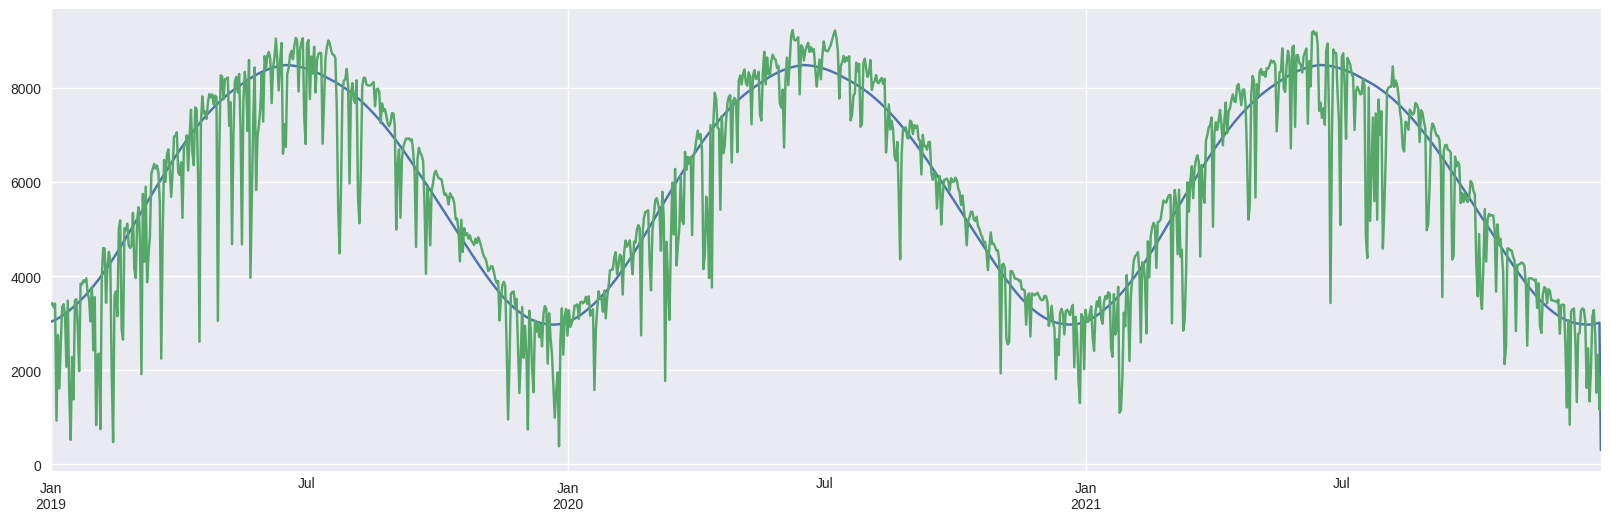

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
from pvlib import location

# ============================================
#  Definir o período e o modelo de céu limpo
# ============================================
start = '2019-01-01'
end = '2021-12-31'

# Define the site location
Latitude = 32.22969
Longitude = -110.95534
Altitude = 786
tz= 'Etc/GMT-7'

site = location.Location(latitude, longitude, tz=tz)

times = pd.date_range(start, end, freq='H', tz=site.tz)

# Modelo de céu limpo Ineichen (gera GHI, DNI e DHI)
clearsky = site.get_clearsky(times, model='ineichen')

# ============================================
# Função auxiliar para plotar e calcular
# ============================================
def plot_component(component: str, ylabel: str):
    """
    Plota e calcula a irradiação diária e anual de um componente (GHI, DNI ou DHI).
    """

    plt.figure(figsize=(20, 6))

    # Plot diário (soma horária → diária)
    clearsky[component].resample('D').sum().plot(label=f'Céu Limpo ({component})')
    nsrdb_data_3Y[component].resample('D').sum().plot(label=f'NSRDB ({component})')
    df_weather_horário[component].resample('D').sum().plot(label=f'Medido ({component})')

    plt.xlabel('Data')
    plt.ylabel(ylabel)
    plt.title(f'Comparação {component} – Medido, NSRDB e Céu Limpo (Ano 2019 a 2021)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Cálculo anual (kWh/m²)
    val_clearsky = clearsky[component].sum() / 1000
    val_nsrdb = nsrdb_data_3Y[component].sum() / 1000
    val_measured = df_weather_horário[component].sum() / 1000
    ratio = (val_measured / val_clearsky) * 100 if val_clearsky > 0 else None

    # Exibir resultados
    print(f"\n=== {component} ===")
    print(f"Céu Limpo (Ineichen): {val_clearsky:.2f} kWh/m²")
    print(f"NSRDB:                {val_nsrdb:.2f} kWh/m²")
    print(f"Medido:               {val_measured:.2f} kWh/m²")
    print(f"Razão (Medido/Céu Limpo): {ratio:.2f}%")

# ============================================
# Plotar e calcular para GHI, DNI e DHI
# ============================================
plot_component('ghi', 'Irradiação Diária (Wh/m²)')
plot_component('dni', 'Irradiação Direta Normal (Wh/m²)')
plot_component('dhi', 'Irradiação Difusa Horizontal (Wh/m²)')

essa analise foi feita para identificar possiveis anomalias de medições no periodo escolhido.

# MODELO DE DECOMPOSIÇÃO DE **ERBS, DISC, BOLAND, DIRINT** - apartir de **GHI**(validando qual modelo é melhor)

In [374]:
#Modelagem de Decomposição com outros modelos de decomposição
from pvlib import irradiance, location

# Primeiro você precisa criar um objeto Location com suas coordenadas
# (substitua latitude, longitude e tz pelos valores corretos)
site = location.Location(latitude, longitude, tz=tz)

# Em seguida, calcule a posição solar para cada instante do seu DataFrame
solar_position = site.get_solarposition(nsrdb_data_3Y.index)

#----------------------------------------------------------------------------------------------
#ERBS
# Agora aplique o modelo ERBS para decompor o GHI em DNI e DHI
out_erbs = irradiance.erbs(
    ghi=nsrdb_data_3Y['ghi'],
    zenith=solar_position['zenith'],
    datetime_or_doy=nsrdb_data_3Y.index
)

# Renomeie as colunas conforme necessário
out_erbs = out_erbs.rename(columns={
    'dni': 'dni_erbs',
    'dhi': 'dhi_erbs'
})
#----------------------------------------------------------------------------------------------
#DISC
out_disc = irradiance.disc(
    nsrdb_data_3Y['ghi'], solar_position['zenith'], nsrdb_data_3Y.index, nsrdb_data_3Y['pressure']*100)
# use "complete sum" AKA "closure" equations: DHI = GHI - DNI * cos(zenith)
df_disc = irradiance.complete_irradiance(
    solar_zenith=solar_position['zenith'], ghi=nsrdb_data_3Y['ghi'], dni=out_disc.dni,
    dhi=None)
out_disc = out_disc.rename(columns={'dni': 'dni_disc'})
out_disc['dhi_disc'] = df_disc.dhi
#----------------------------------------------------------------------------------------------
#BOLAND
out_boland = irradiance.boland(nsrdb_data_3Y['ghi'], solar_position['zenith'], nsrdb_data_3Y.index)
out_boland = out_boland.rename(
    columns={'dni': 'dni_boland', 'dhi': 'dhi_boland'})
#----------------------------------------------------------------------------------------------
#DIRINT
dni_dirint = irradiance.dirint(
    nsrdb_data_3Y['ghi'], solar_position['zenith'], nsrdb_data_3Y.index, nsrdb_data_3Y['pressure']*100,
    temp_dew=None)
# use "complete sum" AKA "closure" equation: DHI = GHI - DNI * cos(zenith)
df_dirint = irradiance.complete_irradiance(
    solar_zenith=solar_position['zenith'], ghi=nsrdb_data_3Y['ghi'], dni=dni_dirint,
    dhi=None)
out_dirint = pd.DataFrame(
    {'dni_dirint': dni_dirint, 'dhi_dirint': df_dirint.dhi},
    index=nsrdb_data_3Y.index)

clearsky apenas para ver valores anormais de medição

Definido seguirmos com os dados de decomposição de Boland por terem menor RSME manor nesses 3 anos

Definido seguirmos com os dados de decomposição de Boland por terem menor RSME manor nesses 3 anos

#**AOI** - Angle of Incidence - Ângulo de Incidência

In [375]:
# --------------------------------------------
# 1) Definições do local e horário
# --------------------------------------------
Latitude = 32.22969
Longitude = -110.95534
Altitude = 786
tz= 'Etc/GMT-7'

# Ângulos da superfície
tilt = 33                      # Inclinação do painel (graus)
surface_azimuth = 180          # Sul (180°)

# --------------------------------------------
# 2) AOI para um instante específico
# --------------------------------------------
date = pd.Timestamp('2021-01-01 10:30:00', tz=tz)

# Calcula a posição solar
solar_position = pvlib.solarposition.get_solarposition(time=date,
                                                       latitude=latitude,
                                                       longitude=longitude)

# Calcula o Ângulo de Incidência (AOI)
aoi = pvlib.irradiance.aoi(surface_tilt=tilt,
                           surface_azimuth=surface_azimuth,
                           solar_zenith=solar_position['zenith'],
                           solar_azimuth=solar_position['azimuth'])

# Exibe os resultados
aoi_deg = aoi.iloc[0]  # valor numérico do AOI
print("AOI (instantâneo):", round(aoi_deg, 2), "graus")
print(aoi)             # mostra também com índice temporal

AOI (instantâneo): 115.54 graus
2021-01-01 10:30:00+07:00   115.54
Name: aoi, dtype: float64


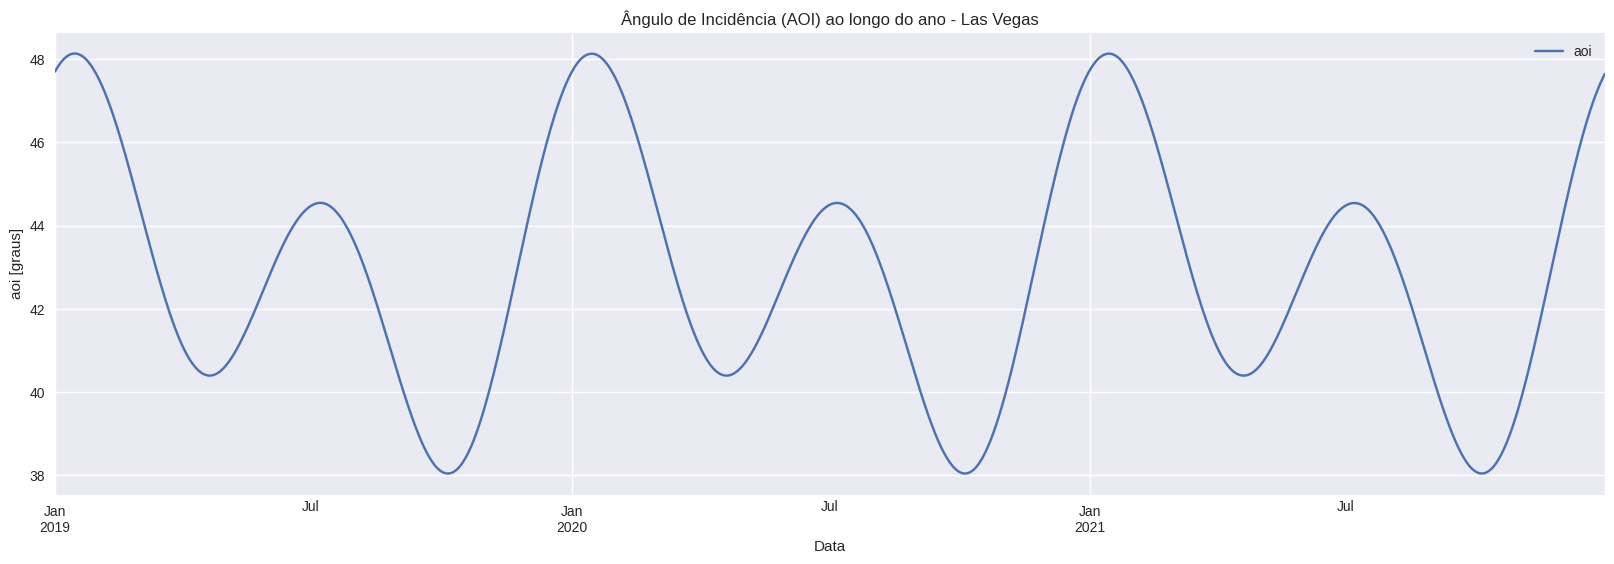

In [376]:


start = '2019-01-01'
end = '2021-12-31'

#Vamos variar o AOI ao longo do dia
site = location.Location(latitude, longitude, tz=tz)
times = pd.date_range(start, end, freq='1D', tz=site.tz)

# Ângulos da superfície
tilt = 33  # inclinação da superfície
surface_azimuth = 180   #  graus oeste do sul (Sul é 180 graus)

# Calcula a posição solar
solar_position = pvlib.solarposition.get_solarposition(time=times, latitude=latitude, longitude=longitude)

# Calcula o ângulo de incidência
aoi = pvlib.irradiance.aoi(surface_tilt=tilt,
                           surface_azimuth=surface_azimuth,
                           solar_zenith=solar_position['zenith'],
                           solar_azimuth=solar_position['azimuth'])

aoi.plot(figsize=(20,6))


plt.title('Ângulo de Incidência (AOI) ao longo do ano - Las Vegas')
plt.ylabel('aoi [graus]')
plt.xlabel('Data')
plt.grid(True)
plt.legend()
plt.show()

# **IAM**

In [377]:
#3. Calcula o fator de perda por ângulo de incidência
iam = pvlib.iam.physical(aoi)
print(iam)

2019-01-01 00:00:00+07:00   0.98
2019-01-02 00:00:00+07:00   0.98
2019-01-03 00:00:00+07:00   0.98
2019-01-04 00:00:00+07:00   0.98
2019-01-05 00:00:00+07:00   0.98
                            ... 
2021-12-27 00:00:00+07:00   0.98
2021-12-28 00:00:00+07:00   0.98
2021-12-29 00:00:00+07:00   0.98
2021-12-30 00:00:00+07:00   0.98
2021-12-31 00:00:00+07:00   0.98
Freq: D, Name: aoi, Length: 1096, dtype: float64


# **POA** -(Plane of Array) Cálculo de Irradiância no Plano do Módulo - em um Sistema com Instalação Fixa

In [378]:
# --- SELECIONAR PERÍODO DE ANÁLISE (1 ano, ou o intervalo desejado) ---

# Defina aqui o intervalo desejado (ajuste conforme seus dados)
start_date = '2019-01-01'
end_date   = '2021-12-31'

# Filtra as séries originais do dataset NSRDB e do Boland
ghi = nsrdb_data_3Y['ghi'].loc[start_date:end_date]
dni = out_boland['dni_boland'].loc[start_date:end_date]
dhi = out_boland['dhi_boland'].loc[start_date:end_date]

# Recalcular solar position para o período selecionado
site = location.Location(latitude, longitude, tz=tz)
solar_position = site.get_solarposition(ghi.index)

# Align dni_extra with the index of ghi, dni, and dhi
dni_extra = pvlib.irradiance.get_extra_radiation(ghi.index)

# Recalculate solar position, airmass_relative, and airmass using the index of ghi
site = location.Location(latitude, longitude, tz=tz)
solar_position = site.get_solarposition(ghi.index)

airmass_relative = pvlib.atmosphere.get_relative_airmass(solar_position['apparent_zenith'])

# Revert altitude change and calculate pressure using latitude as in the original code
pressure = pvlib.atmosphere.alt2pres(altitude = latitude) # Using latitude as in the original code
airmass = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure)

In [379]:
albedo = 0.20
surface_azimuth = 180  # supondo face sul (ou ajuste conforme seu arranjo)
model = 'perez'        # costuma ser melhor que 'isotropic' para inclinações variadas

# faixa de tilt a varrer (0 a 90°, passo 1°)
tilts = np.arange(0, 91, 1)  # passo de 1 grau
poa_series_by_tilt = {}
ratios = []

Melhor tilt com base em POA/GHI médio: 37° -> razão média = 1.171


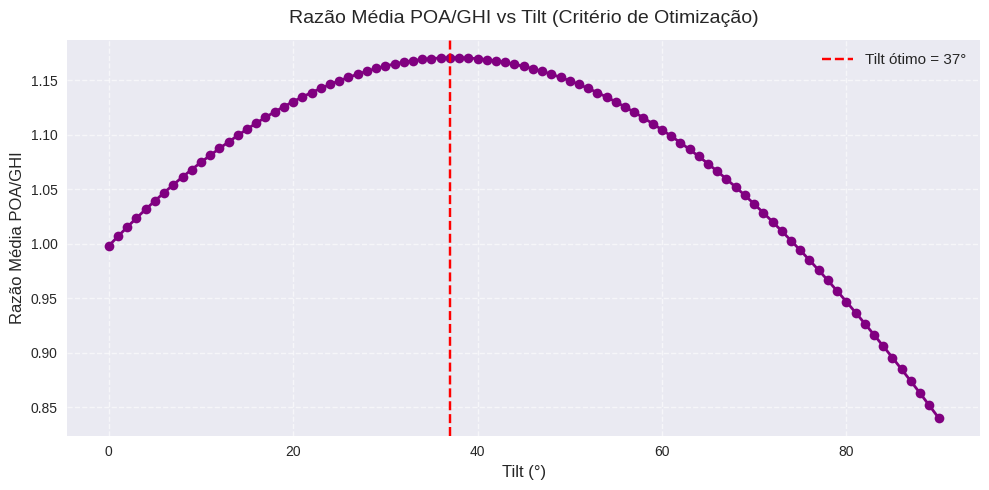

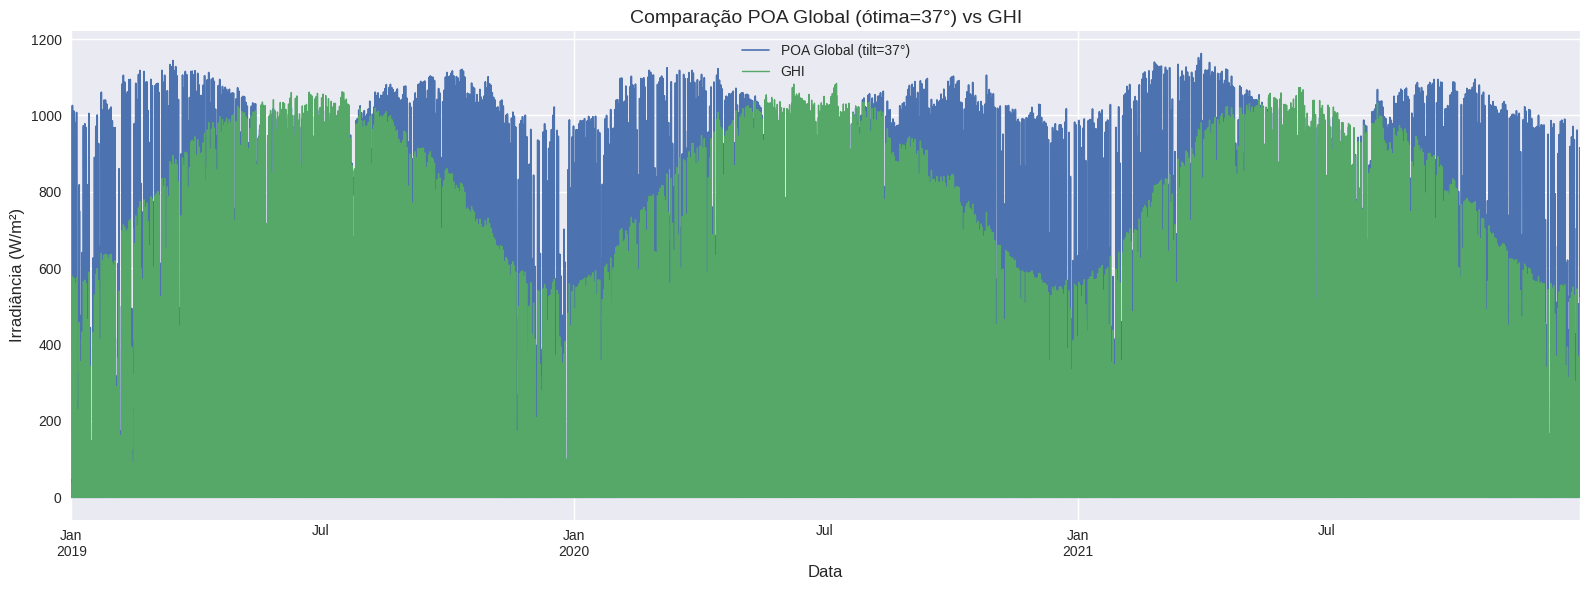

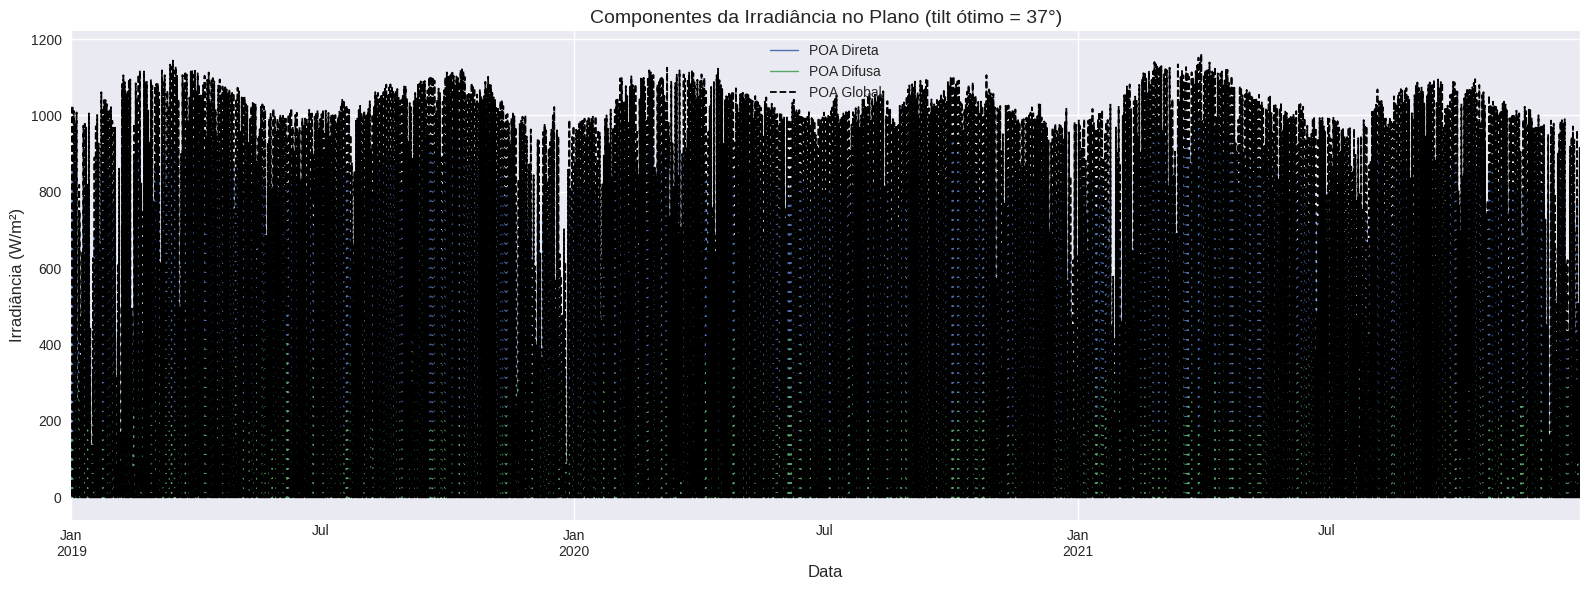

In [380]:
# --- Cálculo da POA total e componentes para um dado tilt ---
def compute_total_poa_for_tilt(tilt):
    poa_all = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        solar_zenith=solar_position['zenith'],
        solar_azimuth=solar_position['azimuth'],
        dni=dni,
        ghi=ghi,
        dhi=dhi,
        dni_extra=dni_extra,
        airmass=airmass,
        albedo=albedo,
        model=model,
        model_perez='allsitescomposite1990'
    )

    poa_global = poa_all['poa_global'].reindex(ghi.index).fillna(0)
    poa_direct = poa_all['poa_direct'].reindex(ghi.index).fillna(0)
    poa_diffuse = poa_all['poa_diffuse'].reindex(ghi.index).fillna(0)

    return poa_global, poa_direct, poa_diffuse


# --- Varredura de inclinações ---
results = []
ratios = []
poa_series_by_tilt = {}

for t in tilts:
    poa_g, poa_d, poa_df = compute_total_poa_for_tilt(t)
    ratio_mean = (poa_g / ghi).replace([np.inf, -np.inf], np.nan).mean()  # média da razão POA/GHI
    ratios.append(ratio_mean)
    results.append(poa_g.sum())  # mantém só pra referência
    poa_series_by_tilt[t] = {'global': poa_g, 'direct': poa_d, 'diffuse': poa_df}

ratios = np.array(ratios)

# --- Definir tilt ótimo com base na razão POA/GHI ---
best_idx = ratios.argmax()
best_tilt = tilts[best_idx]
best_ratio = ratios[best_idx]

print(f"Melhor tilt com base em POA/GHI médio: {best_tilt}° -> razão média = {best_ratio:.3f}")


# --- Gráfico 1: Razão média POA/GHI vs Tilt ---
plt.figure(figsize=(10,5))
plt.plot(tilts, ratios, color='purple', linewidth=2, marker='o')
plt.axvline(best_tilt, color='red', linestyle='--', label=f'Tilt ótimo = {best_tilt}°')
plt.title('Razão Média POA/GHI vs Tilt (Critério de Otimização)', fontsize=14, pad=12)
plt.xlabel('Tilt (°)', fontsize=12)
plt.ylabel('Razão Média POA/GHI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


# --- Gráfico 2: Comparação POA x GHI (para o tilt ótimo) ---
poa_best = poa_series_by_tilt[best_tilt]

plt.figure(figsize=(16,6))
poa_best['global'].plot(label=f'POA Global (tilt={best_tilt}°)', linewidth=1.2)
ghi.plot(label='GHI', linewidth=1.0)
plt.title(f'Comparação POA Global (ótima={best_tilt}°) vs GHI', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Irradiância (W/m²)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Gráfico 3: Componentes POA (direta e difusa) ---
plt.figure(figsize=(16,6))
poa_best['direct'].plot(label='POA Direta', linewidth=1)
poa_best['diffuse'].plot(label='POA Difusa', linewidth=1)
poa_best['global'].plot(label='POA Global', linewidth=1.3, linestyle='--', color='black')
plt.title(f'Componentes da Irradiância no Plano (tilt ótimo = {best_tilt}°)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Irradiância (W/m²)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Melhor angulo 33 graus


=== Métricas Comparativas ===
     Máximo (W/m²)  Média (W/m²)  Energia Total (kWh/m²)
POA       1162.13        277.70                 7304.54 
GHI       1084.00        238.81                 6281.73 


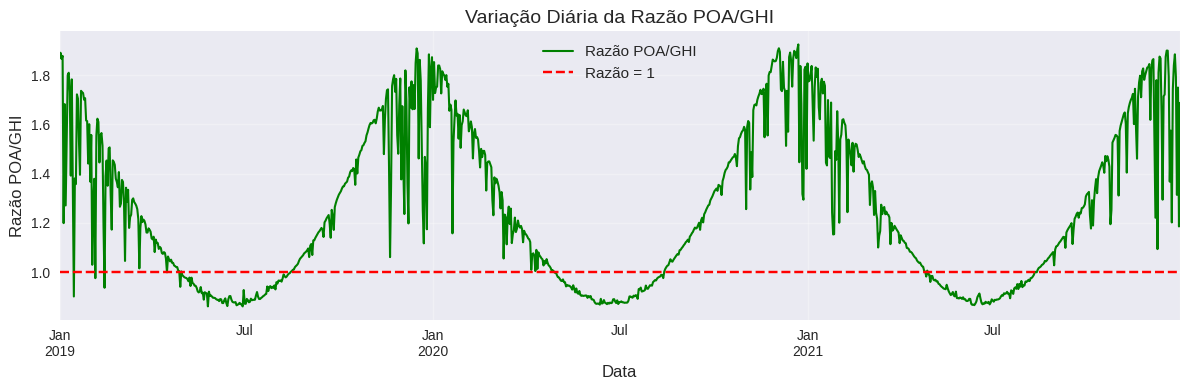

In [381]:
# --- 3. CÁLCULO DE MÉTRICAS COMPARATIVAS ---
poa = poa_best['global']   # <<-- Correção
ghi = nsrdb_data_3Y['ghi']

metrics = {
    'Máximo (W/m²)': [poa.max(), ghi.max()],
    'Média (W/m²)': [poa.mean(), ghi.mean()],
    'Energia Total (kWh/m²)': [poa.sum() / 1000, ghi.sum() / 1000]
}

metrics_df = pd.DataFrame(metrics, index=['POA', 'GHI'])

# Exibe as métricas formatadas
print("\n=== Métricas Comparativas ===")
print(metrics_df.to_string(float_format=lambda x: f"{x:.2f} "))


# --- 4. ANÁLISE DIÁRIA DA RAZÃO POA/GHI ---
if len(poa) > 24:  # Verifica se há dados suficientes (pelo menos 1 dia)
    daily_poa = poa.resample('D').sum() / 1000  # Energia diária POA (kWh/m²)
    daily_ghi = ghi.resample('D').sum() / 1000  # Energia diária GHI (kWh/m²)
    daily_ratio = daily_poa / daily_ghi         # Razão diária POA/GHI

    plt.figure(figsize=(12, 4))
    daily_ratio.plot(color='green', linewidth=1.5, label='Razão POA/GHI')
    plt.axhline(y=1, color='r', linestyle='--', label='Razão = 1')
    plt.title('Variação Diária da Razão POA/GHI', fontsize=14)
    plt.ylabel('Razão POA/GHI', fontsize=12)
    plt.xlabel('Data', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [382]:
poa.keys()


DatetimeIndex(['2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',
               '2019-01-01 02:00:00+00:00', '2019-01-01 03:00:00+00:00',
               '2019-01-01 04:00:00+00:00', '2019-01-01 05:00:00+00:00',
               '2019-01-01 06:00:00+00:00', '2019-01-01 07:00:00+00:00',
               '2019-01-01 08:00:00+00:00', '2019-01-01 09:00:00+00:00',
               ...
               '2021-12-31 14:00:00+00:00', '2021-12-31 15:00:00+00:00',
               '2021-12-31 16:00:00+00:00', '2021-12-31 17:00:00+00:00',
               '2021-12-31 18:00:00+00:00', '2021-12-31 19:00:00+00:00',
               '2021-12-31 20:00:00+00:00', '2021-12-31 21:00:00+00:00',
               '2021-12-31 22:00:00+00:00', '2021-12-31 23:00:00+00:00'],
              dtype='datetime64[ns, Etc/GMT+0]', length=26304, freq=None)

# Modelos de temperatura do modulo

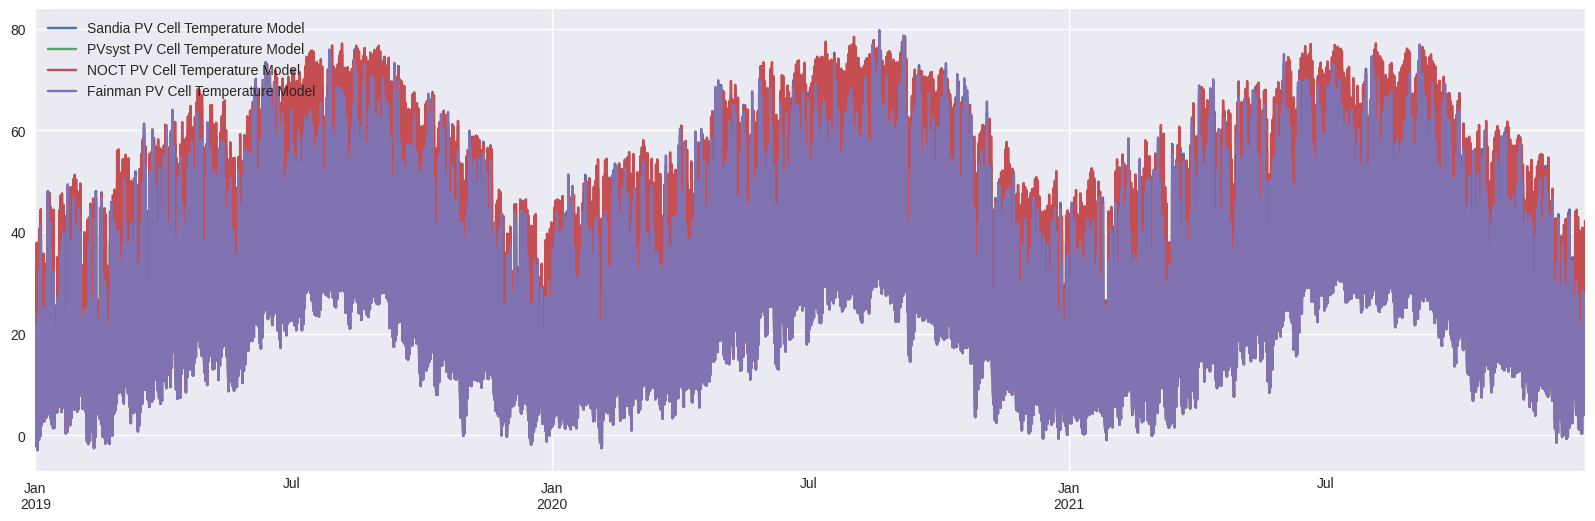

In [383]:
PV_Cell_Temperature_Sandia = pvlib.temperature.sapm_cell(poa_global = poa, temp_air = nsrdb_data_3Y['temp_air'],
                                                         wind_speed = nsrdb_data_3Y['wind_speed'],
                                                         a = -3.47, b = -0.0594, deltaT = 3,
                                                         irrad_ref=1000.0)

PV_Cell_Temperature_PVsyst = pvlib.temperature.pvsyst_cell(poa_global = poa, temp_air = nsrdb_data_3Y['temp_air'],
                                                           wind_speed = nsrdb_data_3Y['wind_speed'],
                                                           u_c = 29.0, u_v=0.0, module_efficiency=0.1701,
                                                           alpha_absorption=0.9)

PV_Cell_Temperature_NOCT = pvlib.temperature.ross(poa_global = poa,
                                                  temp_air = nsrdb_data_3Y['temp_air'],
                                                  noct = 45)

PV_Cell_Temperature_Fainman = pvlib.temperature.faiman(poa_global = poa, temp_air = nsrdb_data_3Y['temp_air'],
                                                       wind_speed= nsrdb_data_3Y['wind_speed'],
                                                       u0=25.0, u1=6.84)



PV_Cell_Temperature_Sandia.plot(label='Sandia PV Cell Temperature Model', figsize = (20,6))
PV_Cell_Temperature_PVsyst.plot(label='PVsyst PV Cell Temperature Model')
PV_Cell_Temperature_NOCT.plot(label='NOCT PV Cell Temperature Model')
PV_Cell_Temperature_Fainman.plot(label = 'Fainman PV Cell Temperature Model')
plt.legend()


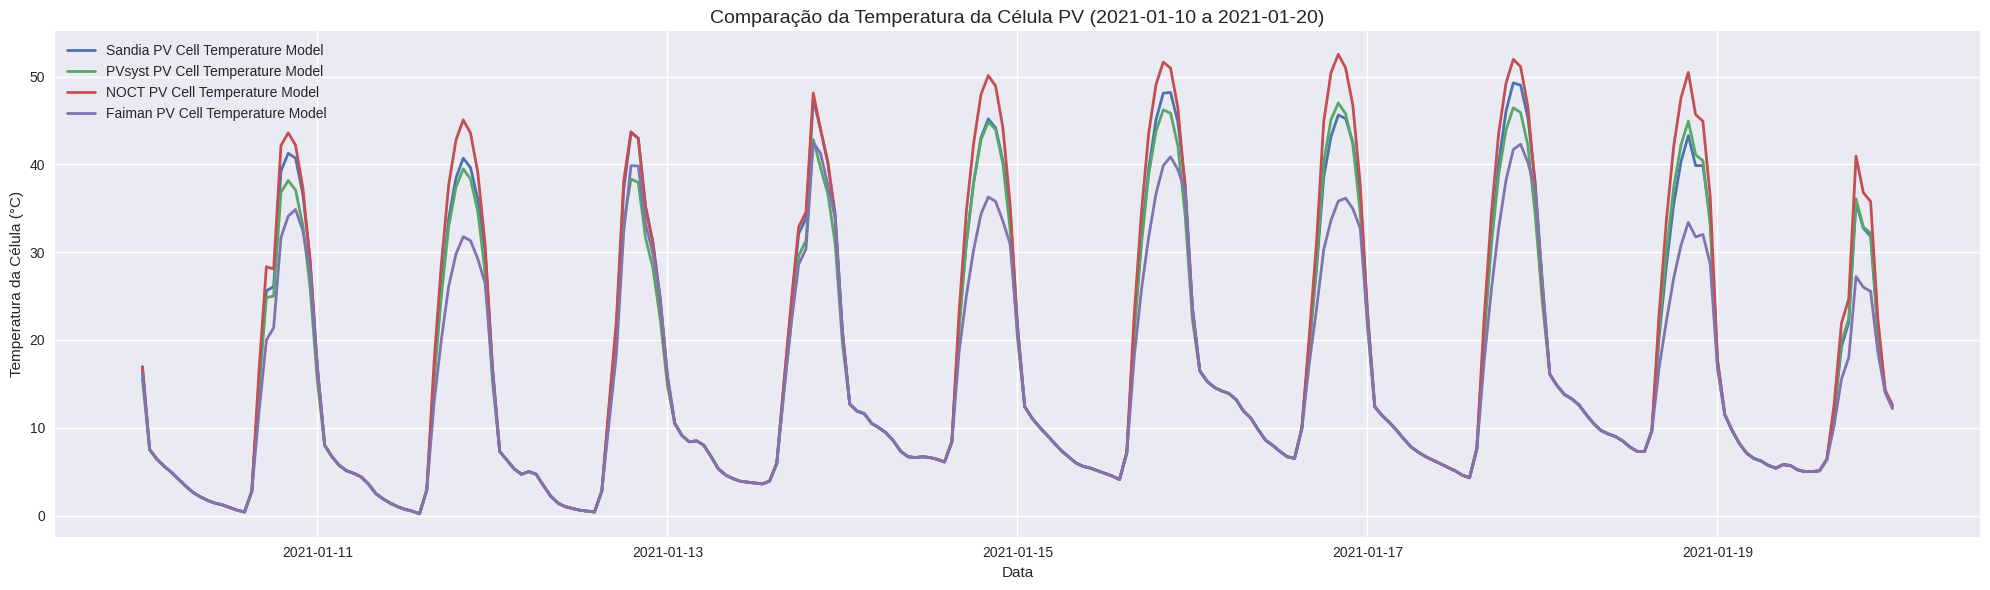

In [384]:
import matplotlib.pyplot as plt

# === Escolha o intervalo de 10 dias ===
# Exemplo:
start_date = '2021-01-10'
end_date = '2021-01-20'

# === Selecionar o intervalo ===
mask = (nsrdb_data_3Y.index >= start_date) & (nsrdb_data_3Y.index <= end_date)

sandia_10d = PV_Cell_Temperature_Sandia[mask]
pvsyst_10d = PV_Cell_Temperature_PVsyst[mask]
noct_10d = PV_Cell_Temperature_NOCT[mask]
faiman_10d = PV_Cell_Temperature_Fainman[mask]

# === Plotar os 4 modelos no mesmo gráfico ===
plt.figure(figsize=(20, 6))
plt.plot(sandia_10d, label='Sandia PV Cell Temperature Model', linewidth=2)
plt.plot(pvsyst_10d, label='PVsyst PV Cell Temperature Model', linewidth=2)
plt.plot(noct_10d, label='NOCT PV Cell Temperature Model', linewidth=2)
plt.plot(faiman_10d, label='Faiman PV Cell Temperature Model', linewidth=2)

# === Personalizar ===
plt.title(f'Comparação da Temperatura da Célula PV ({start_date} a {end_date})', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Temperatura da Célula (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

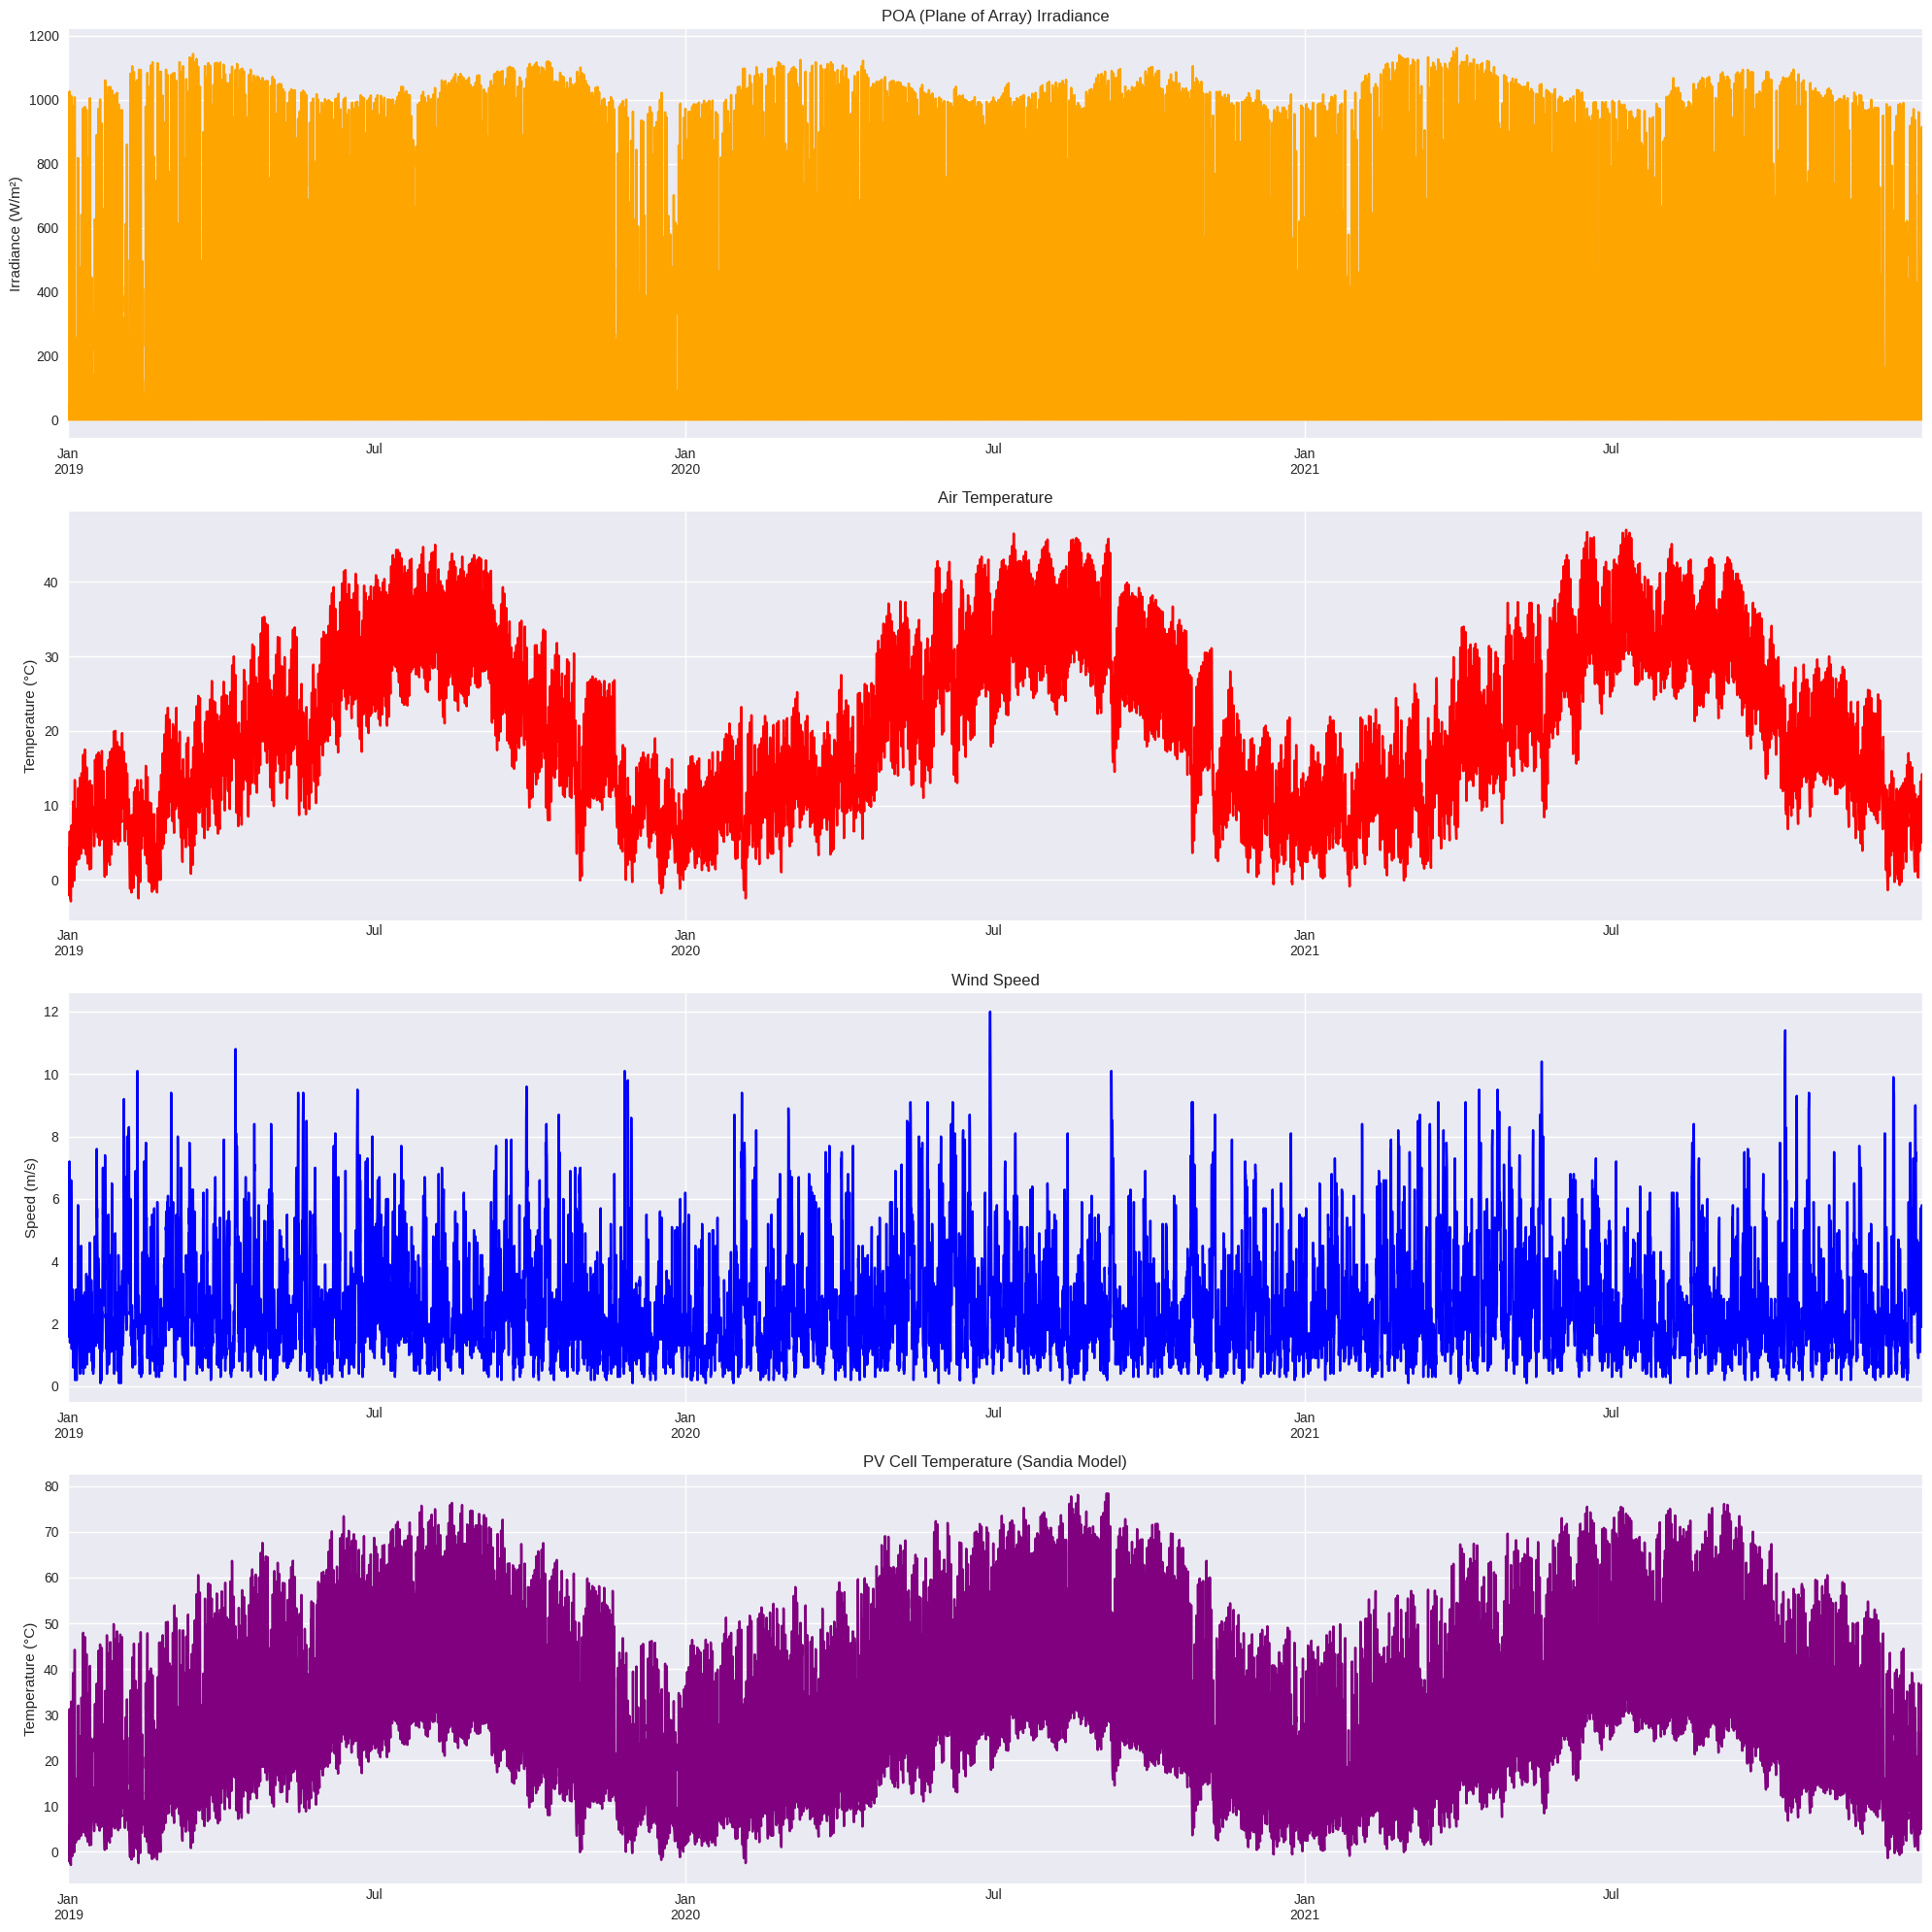

In [385]:
#Influência de Parâmetros para a Modelagem de Temperatura
#Pedir para plotarem os gráficos com
import matplotlib.pyplot as plt

# Criar figura com 4 subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.4)

# Gráfico 1: poa.plot()
poa.plot(ax=axes[0], title='POA (Plane of Array) Irradiance', color='orange')
axes[0].set_ylabel('Irradiance (W/m²)')
axes[0].grid(True)

# Gráfico 2: Temperatura do ar
nsrdb_data_3Y['temp_air'].plot(ax=axes[1], title='Air Temperature', color='red')
axes[1].set_ylabel('Temperature (°C)')
axes[1].grid(True)

# Gráfico 3: Velocidade do vento
nsrdb_data_3Y['wind_speed'].plot(ax=axes[2], title='Wind Speed', color='blue')
axes[2].set_ylabel('Speed (m/s)')
axes[2].grid(True)

# Gráfico 4: Temperatura da célula PV
PV_Cell_Temperature_Sandia.plot(ax=axes[3], title='PV Cell Temperature (Sandia Model)', color='purple')
axes[3].set_ylabel('Temperature (°C)')
axes[3].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()


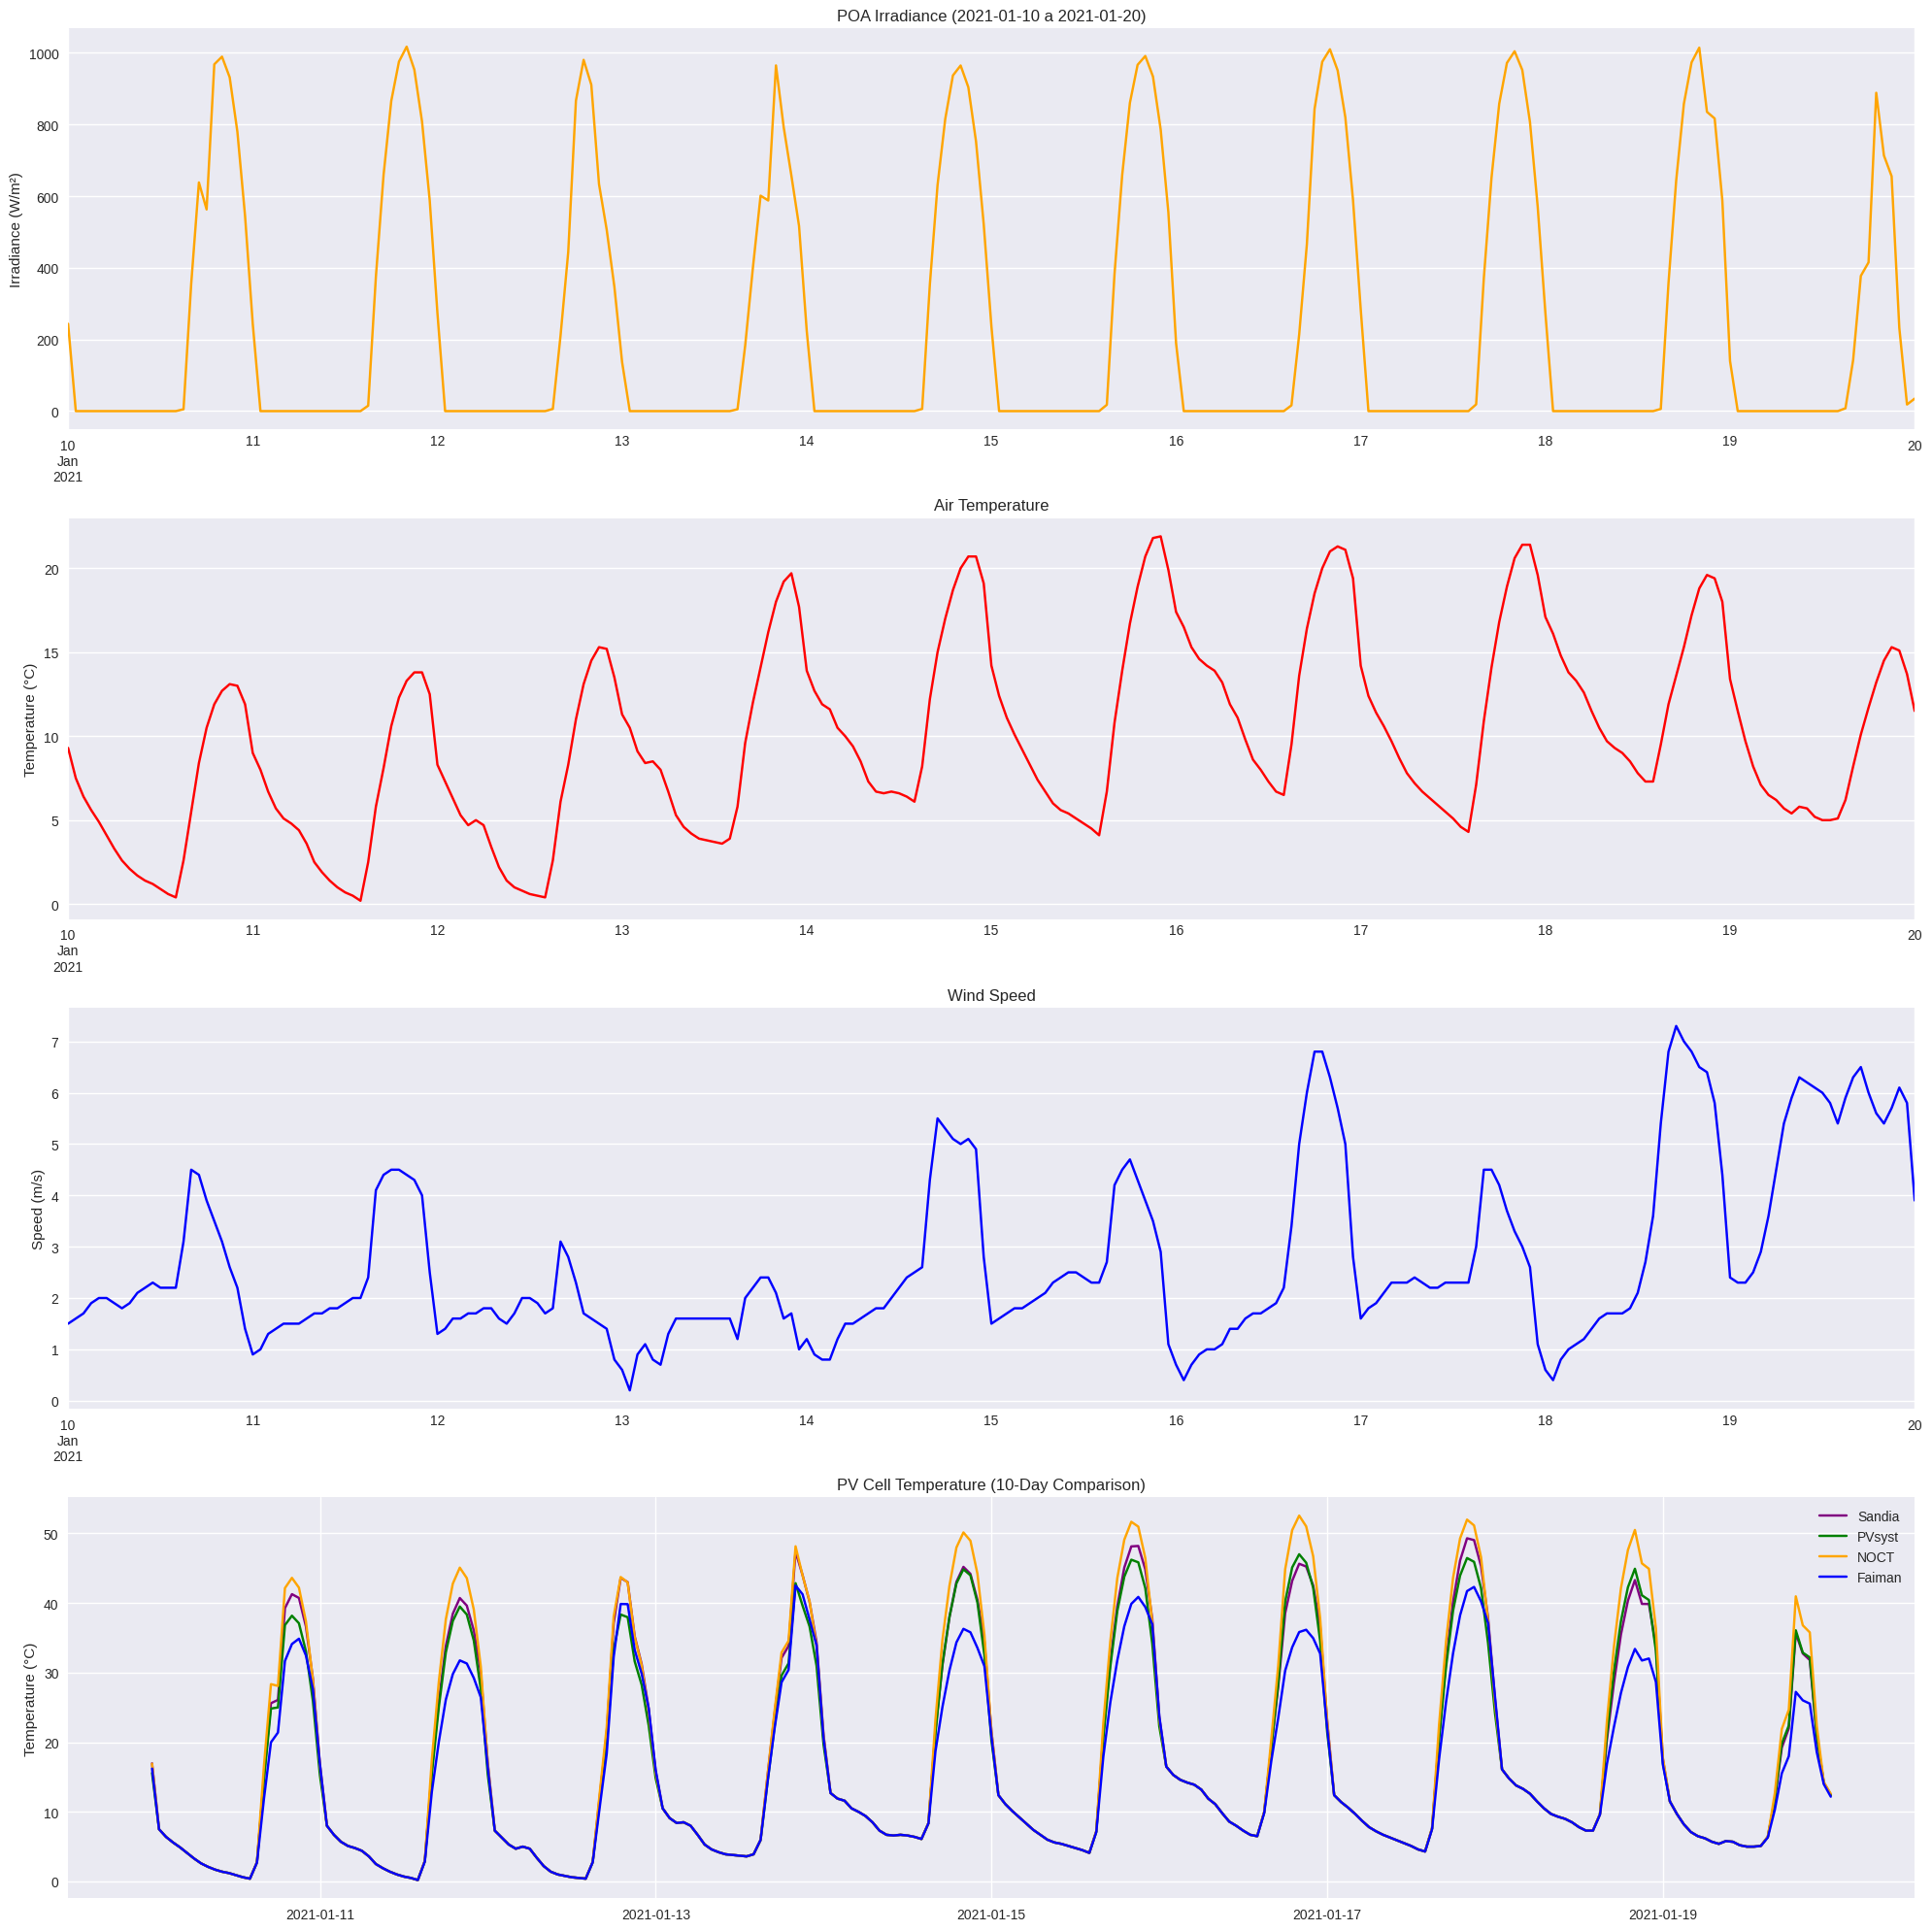

In [386]:
import matplotlib.pyplot as plt

# === Defina o período de 10 dias que você quer visualizar ===
# Exemplo:
start_date = '2021-01-10'
end_date = '2021-01-20'

# === Selecionar o intervalo de 10 dias ===
mask = (nsrdb_data_3Y.index >= start_date) & (nsrdb_data_3Y.index <= end_date)

poa_10d = poa[mask]
temp_air_10d = nsrdb_data_3Y['temp_air'][mask]
wind_speed_10d = nsrdb_data_3Y['wind_speed'][mask]
sandia_10d = PV_Cell_Temperature_Sandia[mask]
pvsyst_10d = PV_Cell_Temperature_PVsyst[mask]
noct_10d = PV_Cell_Temperature_NOCT[mask]
faiman_10d = PV_Cell_Temperature_Fainman[mask]

# === Criar figura com 4 subplots ===
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
plt.subplots_adjust(hspace=0.4)

# Gráfico 1: Irradiância no plano do módulo (POA)
poa_10d.plot(ax=axes[0], color='orange', title=f'POA Irradiance ({start_date} a {end_date})')
axes[0].set_ylabel('Irradiance (W/m²)')
axes[0].grid(True)

# Gráfico 2: Temperatura do ar
temp_air_10d.plot(ax=axes[1], color='red', title='Air Temperature')
axes[1].set_ylabel('Temperature (°C)')
axes[1].grid(True)

# Gráfico 3: Velocidade do vento
wind_speed_10d.plot(ax=axes[2], color='blue', title='Wind Speed')
axes[2].set_ylabel('Speed (m/s)')
axes[2].grid(True)

# Gráfico 4: Temperatura da célula PV (comparação entre modelos)
axes[3].plot(sandia_10d, label='Sandia', color='purple')
axes[3].plot(pvsyst_10d, label='PVsyst', color='green')
axes[3].plot(noct_10d, label='NOCT', color='orange')
axes[3].plot(faiman_10d, label='Faiman', color='blue')
axes[3].set_title('PV Cell Temperature (10-Day Comparison)')
axes[3].set_ylabel('Temperature (°C)')
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()


In [387]:
#Sem influência da Temperatura
P_gen = eff_ref * A_c * poa

foi escolhido o PVsyst para perdas de temperatura

In [388]:
#Com influência da Temperatura (deixa o pessoal fazer)
P_gen_temp = eff_ref * A_c * poa * (1 + (-0.0029)*(PV_Cell_Temperature_PVsyst - 25))

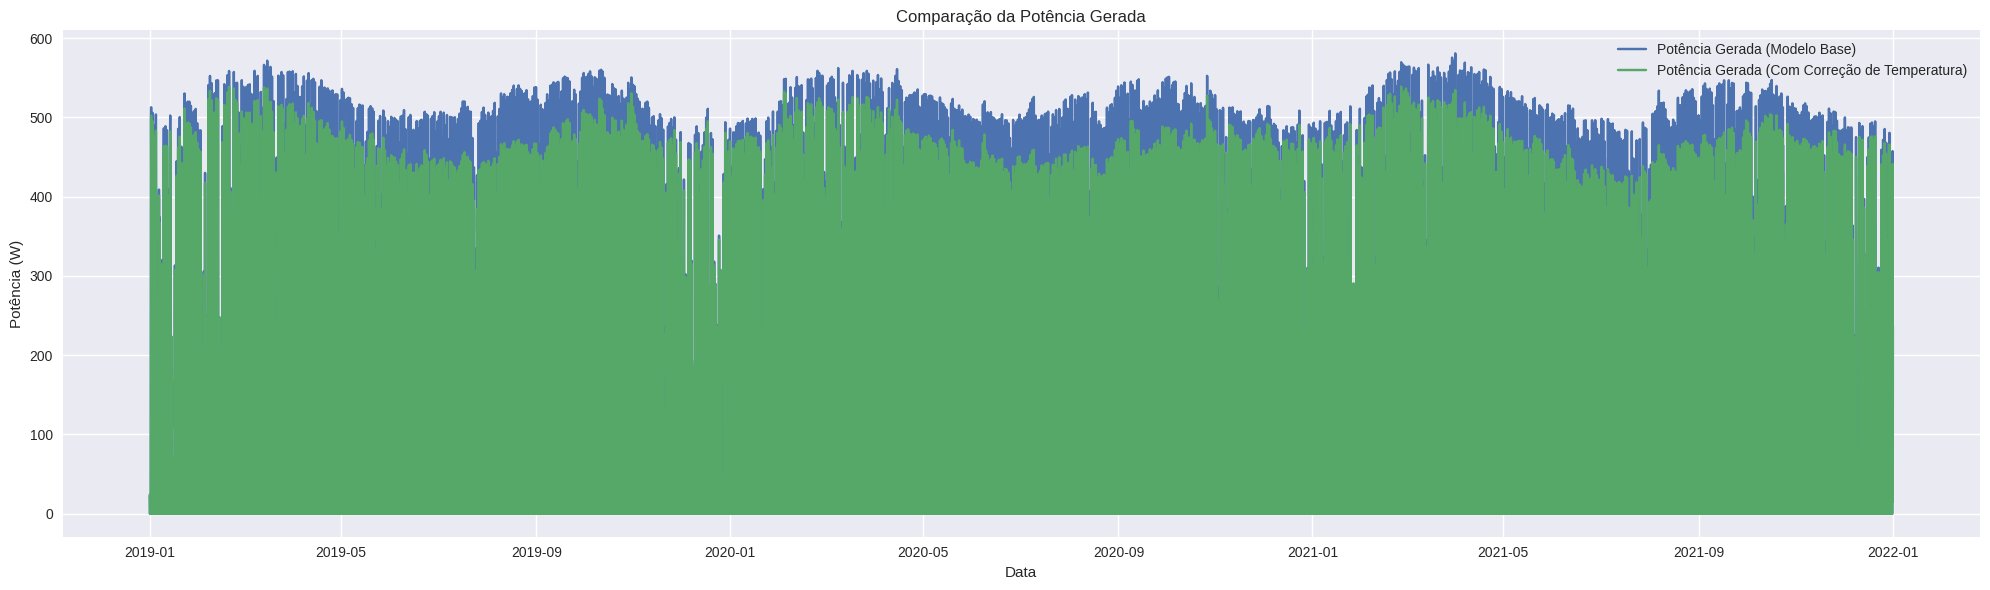

In [389]:
plt.figure(figsize=(20,6))
plt.plot(P_gen, label='Potência Gerada (Modelo Base)')
plt.plot(P_gen_temp, label='Potência Gerada (Com Correção de Temperatura)')
plt.title('Comparação da Potência Gerada')
plt.xlabel('Data')
plt.ylabel('Potência (W)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# CURVA IV

## Funções para Extração de Parâmetros e Resolução da Equação Característica da Curva IV (De Soto)

In [390]:
from pvlib import pvsystem
from scipy.constants import Boltzmann, elementary_charge

In [391]:
def desotorefparameters(Vmp, Imp, Voc, Isc, alpha, beta, Ns, EgRef, dEgdT, Tref, Gref):
    desoto_fit_params = pvlib.ivtools.sdm.fit_desoto(Vmp,
                                                     Imp,
                                                     Voc,
                                                     Isc,
                                                     alpha,
                                                     beta,
                                                     Ns,
                                                     EgRef,
                                                     dEgdT,
                                                     Tref,
                                                     Gref,
                                                     root_kwargs = {'method': 'lm', 'options':{'maxiter':10000, 'xtol': 1e-3, 'gtol': 1e-3}})
    desoto_fit_params[0]

    fitted_params = desoto_fit_params[0]

    desoto_params_dict = fitted_params

    results_df_desoto = pd.DataFrame(columns = ['a_ref', 'Ipv_ref', 'Io_ref', 'Rp_ref', 'R_s'])

    results_df_desoto.loc[1] = [desoto_params_dict['a_ref'], desoto_params_dict['I_L_ref'], desoto_params_dict['I_o_ref'],
                                desoto_params_dict['R_sh_ref'], desoto_params_dict['R_s']]
    return(results_df_desoto)

In [392]:
def desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref, Rp_ref, R_s, EgRef, dEgdT, Gref, Tref, method = 'lambertw', number_of_points = 100):
    diode_params_desoto = pvlib.pvsystem.calcparams_desoto(irrad,
                                                          temp_cell,
                                                          alpha,
                                                          a_ref,
                                                          Ipv_ref,
                                                          Io_ref,
                                                          Rp_ref,
                                                          R_s,
                                                          EgRef,
                                                          dEgdT,
                                                          Gref,
                                                          Tref)
    SDE_params = {
        'photocurrent': diode_params_desoto[0],
        'saturation_current': diode_params_desoto[1],
        'resistance_series': diode_params_desoto[2],
        'resistance_shunt': diode_params_desoto[3],
        'nNsVth': diode_params_desoto[4]
    }

    curve_info = pvsystem.singlediode(method=method, **SDE_params)
    v = pd.DataFrame(np.linspace(0, curve_info['v_oc'], number_of_points))
    i = pd.DataFrame(pvsystem.i_from_v(voltage=v, method=method, **SDE_params))

    return ({'Key_Points': curve_info,
             'Voltage': v,
             'Current': i})

##**CONSTANTES**

In [393]:
#Constantes necessárias para a modelagem em STC
EgRef=1.121 #Valence energy band-gap for Crystalline Silicon
dEgdT=- 0.0002677 #
Tref = 25 #Temperature (°C) under STC
Gref = 1000 #Irradiance (W/m²) under STC
k = Boltzmann
q = elementary_charge

In [394]:
# Condições de Irradiância em STC (1000 W/m² e 25°C)
irrad = 1000
temp_cell = 25

In [395]:
print(irrad)
print(temp_cell)

1000
25


## extração de parametros curva IV

In [396]:
desoto_ref_parameters = desotorefparameters(Vmp, Imp, Voc, Isc, alpha, beta, Ns, EgRef, dEgdT, Tref, Gref)
print('Os 5 parâmetros do SDM em STC')
desoto_ref_parameters

Os 5 parâmetros do SDM em STC


a_ref  Ipv_ref  Io_ref  Rp_ref  R_s
1   1.59    14.24    0.00  109.75 0.15

## Resolvendo a Equação Característica do SDM 5 P (Métodos do Lambert-W, Newton-Raphson e Bishop)

In [397]:
a_ref = desoto_ref_parameters['a_ref'][1]
Ipv_ref = desoto_ref_parameters['Ipv_ref'][1]
Io_ref = desoto_ref_parameters['Io_ref'][1]
Rp_ref = desoto_ref_parameters['Rp_ref'][1]
R_s = desoto_ref_parameters['R_s'][1]

results = desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref, Rp_ref, R_s, EgRef, dEgdT, Gref, Tref, method = 'lambertw', number_of_points = 100)
print('Pontos chave da Curva IV')
results['Key_Points']

Pontos chave da Curva IV


{'i_sc': 14.220278530363343,
 'v_oc': 44.705419791252325,
 'i_mp': 13.299672311291761,
 'v_mp': 37.660570172698186,
 'p_mp': np.float64(500.8732423532945),
 'i_x': 14.016854971028307,
 'i_xx': 9.978013122511356}

Curva IV em STC destacando o Ponto de Máxima Potência


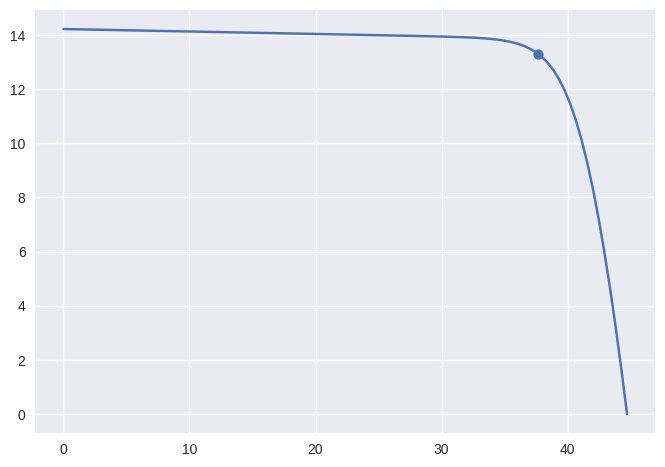

In [398]:
print('Curva IV em STC destacando o Ponto de Máxima Potência')
plt.plot(results['Voltage'], results['Current'])
plt.scatter(results['Key_Points']['v_mp'], results['Key_Points']['i_mp'])
plt.show()

In [399]:
print('Calculando o Fator de Forma da Curva IV')
FF = (results['Key_Points']['i_mp']*results['Key_Points']['v_mp'])/(results['Key_Points']['i_sc']*results['Key_Points']['v_oc'])
print(FF)

Calculando o Fator de Forma da Curva IV
0.7878790474350955


## Determinem o Fator de Idealidade do Módulo

In [400]:

desoto_ref_parameters['a_ref']

1   1.59
Name: a_ref, dtype: float64

In [401]:
Vt = k/q*(Tref + 273.15)
n = desoto_ref_parameters['a_ref']/(Ns*Vt)
print(n)

1   0.52
Name: a_ref, dtype: float64


## Modelagem da Curva IV com a Variação de Temperatura e Irradiância

In [402]:
# Variando a Irradiância e Mantendo a Temperatura Constante
irrad = np.array([200, 400, 600, 800, 1000])
temp_cell = np.array([25, 25, 25, 25, 25])

In [403]:

results = desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref, Rp_ref, R_s, EgRef, dEgdT, Gref, Tref, method = 'lambertw', number_of_points = 100)
results['Key_Points']

i_sc  v_oc  i_mp  v_mp   p_mp   i_x  i_xx
0  2.85 42.15  2.67 36.67  97.78  2.81  2.17
1  5.69 43.25  5.33 37.36 199.16  5.61  4.25
2  8.54 43.89  7.99 37.61 300.57  8.42  6.24
3 11.38 44.35 10.65 37.69 401.26 11.22  8.15
4 14.22 44.71 13.30 37.66 500.87 14.02  9.98

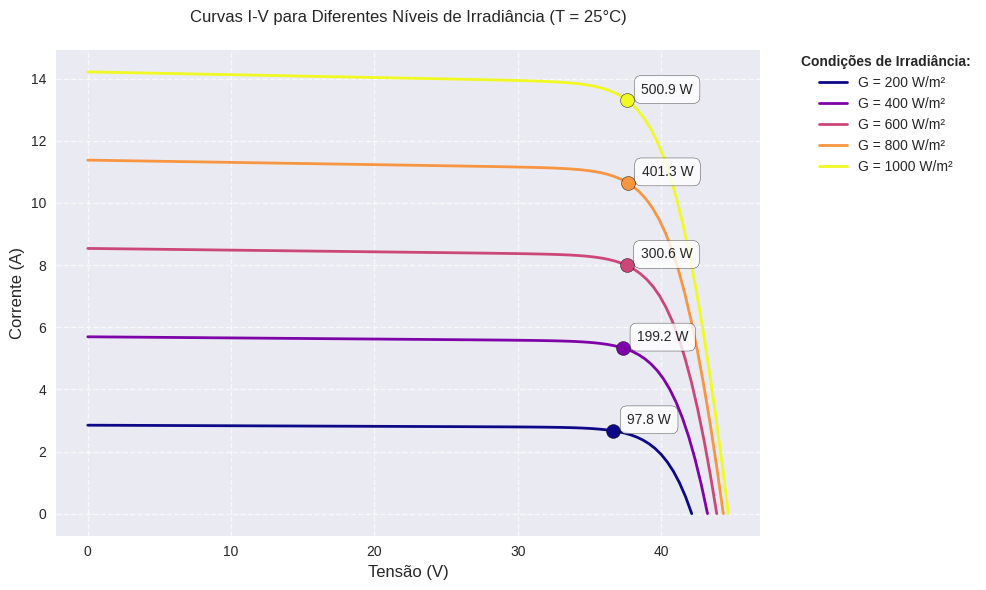

In [404]:
# Variando a Irradiância e Mantendo a Temperatura Constante
irrad = np.array([200, 400, 600, 800, 1000])  # Valores de irradiância em W/m²
temp_cell = np.array([25, 25, 25, 25, 25])    # Temperatura constante em °C

results = desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref, Rp_ref, R_s, EgRef, dEgdT, Gref, Tref, method='lambertw', number_of_points=100)
key_points = results['Key_Points']

# Configurações do gráfico
plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(irrad)))  # Paleta de cores diferente para irradiância

for i, G in enumerate(irrad):
    # Curva I-V
    plt.plot(results['Voltage'][i], results['Current'][i],
             color=colors[i],
             linewidth=2,
             label=f'G = {G} W/m²')

    # Ponto de máxima potência
    plt.scatter(key_points["v_mp"][i], key_points["i_mp"][i],
                color=colors[i],
                s=100,
                edgecolor='black',
                zorder=5)

    # Anotação do ponto MPP
    plt.annotate(f'{key_points["p_mp"][i]:.1f} W',
                 (key_points["v_mp"][i], key_points["i_mp"][i]),
                 textcoords="offset points",
                 xytext=(10, 5),
                 ha='left',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

# Elementos do gráfico
plt.title('Curvas I-V para Diferentes Níveis de Irradiância (T = 25°C)', pad=20)
plt.xlabel('Tensão (V)', fontsize=12)
plt.ylabel('Corrente (A)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Legenda personalizada
legend = plt.legend(bbox_to_anchor=(1.05, 1),
                    loc='upper left',
                    title='Condições de Irradiância:',
                    borderaxespad=0.,
                    fontsize=10)
legend.get_title().set_fontweight('bold')

plt.tight_layout()
plt.show()

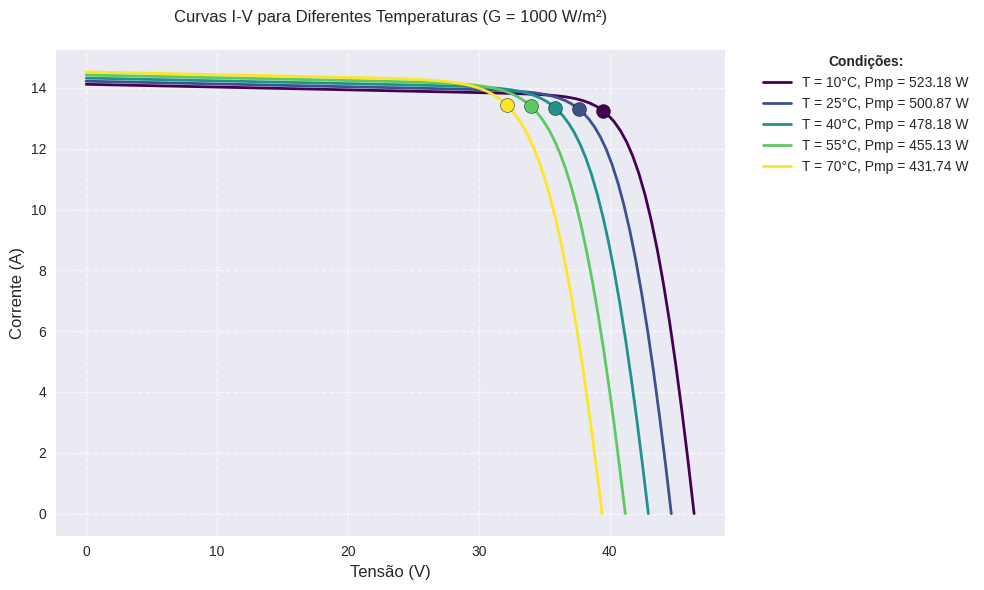

In [405]:
# Variando a Temperatura e Mantendo a Irradiância Constante
irrad = np.array([1000, 1000, 1000, 1000, 1000])  # Irradiância constante em W/m²
temp_cell = np.array([10, 25, 40, 55, 70])        # Valores de temperatura em °C

results = desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref, Rp_ref, R_s, EgRef, dEgdT, Gref, Tref, method='lambertw', number_of_points=100)
key_points = results['Key_Points']

# Configurações do gráfico
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(temp_cell)))  # Paleta de cores

for i, temp in enumerate(temp_cell):
    # Curva I-V
    plt.plot(results['Voltage'][i], results['Current'][i],
             color=colors[i],
             linewidth=2,
             label=f'T = {temp}°C, Pmp = {key_points["p_mp"][i]:.2f} W')

    # Ponto de máxima potência
    plt.scatter(key_points["v_mp"][i], key_points["i_mp"][i],
                color=colors[i],
                s=100,
                edgecolor='black',
                zorder=5)

    # Anotação do ponto MPP
    '''plt.annotate(f'{key_points["p_mp"][i]:.1f} W',
                 (key_points["v_mp"][i], key_points["i_mp"][i]),
                 textcoords="offset points",
                 xytext=(10, 5),
                 ha='left',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))'''

# Elementos do gráfico
plt.title('Curvas I-V para Diferentes Temperaturas (G = 1000 W/m²)', pad=20)
plt.xlabel('Tensão (V)', fontsize=12)
plt.ylabel('Corrente (A)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Legenda personalizada
legend = plt.legend(bbox_to_anchor=(1.05, 1),
                    loc='upper left',
                    title='Condições:',
                    borderaxespad=0.,
                    fontsize=10)
legend.get_title().set_fontweight('bold')

plt.tight_layout()
plt.show()

## Eficiência do Módulo com Variação de Irradiância

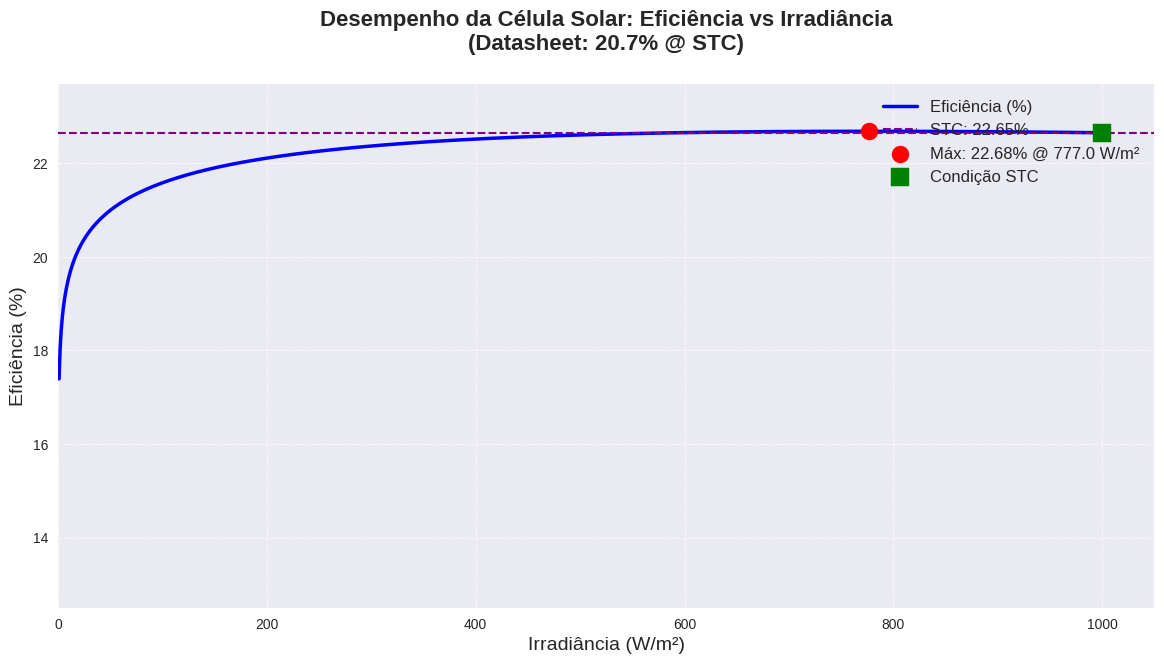

In [406]:
# Configuração do estilo do gráfico
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 7))

# Dados
irrad = np.linspace(1, 1000, 1000)
temp_cell = np.full(1000, 25)

results = desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref,
                            Rp_ref, R_s, EgRef, dEgdT, Gref, Tref,
                            method='lambertw', number_of_points=100)
eff = (results['Key_Points']['p_mp'])/(A_c*irrad) * 100  # Já convertido para %

# Encontrando o ponto de máxima eficiência
max_eff_idx = np.argmax(eff)
max_eff = eff[max_eff_idx]
max_irrad = irrad[max_eff_idx]

# Ponto STC
stc_idx = np.where(irrad >= 1000)[0][0]
stc_eff = eff[stc_idx]

# Plot principal
plt.plot(irrad, eff, 'b-', linewidth=2.5, label='Eficiência (%)')

# Linha horizontal no valor STC
plt.axhline(y=stc_eff, color='purple', linestyle='--', linewidth=1.5,
           label=f'STC: {stc_eff:.2f}%')

# Destaque para ponto de máxima eficiência
plt.scatter(max_irrad, max_eff, color='red', s=150, zorder=5,
           label=f'Máx: {max_eff:.2f}% @ {max_irrad:.1f} W/m²')

# Destaque para ponto STC
plt.scatter(1000, stc_eff, color='green', s=150, zorder=5,
           marker='s', label='Condição STC')

# Elementos gráficos
plt.title('Desempenho da Célula Solar: Eficiência vs Irradiância\n(Datasheet: 20.7% @ STC)',
          fontsize=16, fontweight='bold', pad=25)
plt.xlabel('Irradiância (W/m²)', fontsize=14)
plt.ylabel('Eficiência (%)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Configurações finais
plt.xlim(0, 1050)
plt.ylim(12.5, max(16.5, max_eff)+1)  # Considerando o valor do datasheet
plt.legend(loc='upper right', fontsize=12, framealpha=0.9, shadow=True)
plt.tight_layout(pad=2.0)

plt.show()

## Eficiência do Módulo com Variação de Irradiância

In [407]:
def desotorefparameters(Vmp, Imp, Voc, Isc, alpha, beta, Ns, EgRef, dEgdT, Tref, Gref):
    desoto_fit_params = pvlib.ivtools.sdm.fit_desoto(Vmp,
                                                     Imp,
                                                     Voc,
                                                     Isc,
                                                     alpha,
                                                     beta,
                                                     Ns,
                                                     EgRef,
                                                     dEgdT,
                                                     Tref,
                                                     Gref,
                                                     root_kwargs = {'method': 'lm', 'options':{'maxiter':10000, 'xtol': 1e-3, 'gtol': 1e-3}})
    desoto_fit_params[0]

    fitted_params = desoto_fit_params[0]

    desoto_params_dict = fitted_params

    results_df_desoto = pd.DataFrame(columns = ['a_ref', 'Ipv_ref', 'Io_ref', 'Rp_ref', 'R_s'])

    results_df_desoto.loc[1] = [desoto_params_dict['a_ref'], desoto_params_dict['I_L_ref'], desoto_params_dict['I_o_ref'],
                                desoto_params_dict['R_sh_ref'], desoto_params_dict['R_s']]
    return(results_df_desoto)

def desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref, Rp_ref, R_s, EgRef, dEgdT, Gref, Tref, method = 'lambertw', number_of_points = 100):
    diode_params_desoto = pvlib.pvsystem.calcparams_desoto(irrad,
                                                          temp_cell,
                                                          alpha,
                                                          a_ref,
                                                          Ipv_ref,
                                                          Io_ref,
                                                          Rp_ref,
                                                          R_s,
                                                          EgRef,
                                                          dEgdT,
                                                          Gref,
                                                          Tref)
    SDE_params = {
        'photocurrent': diode_params_desoto[0],
        'saturation_current': diode_params_desoto[1],
        'resistance_series': diode_params_desoto[2],
        'resistance_shunt': diode_params_desoto[3],
        'nNsVth': diode_params_desoto[4]
    }

    curve_info = pvsystem.singlediode(method=method, **SDE_params)
    v = pd.DataFrame(np.linspace(0, curve_info['v_oc'], number_of_points))
    i = pd.DataFrame(pvsystem.i_from_v(voltage=v, method=method, **SDE_params))

    return ({'Key_Points': curve_info,
             'Voltage': v,
             'Current': i})

#Constantes necessárias para a modelagem em STC
EgRef=1.121 #Valence energy band-gap for Crystalline Silicon
dEgdT=- 0.0002677 #
Tref = 25 #Temperature (°C) under STC
Gref = 1000 #Irradiance (W/m²) under STC
k = Boltzmann
q = elementary_charge

In [408]:
desoto_ref_parameters = desotorefparameters(Vmp, Imp, Voc, Isc, alpha, beta, Ns, EgRef, dEgdT, Tref, Gref)
print('Os 5 parâmetros do SDM em STC')
desoto_ref_parameters

Os 5 parâmetros do SDM em STC


a_ref  Ipv_ref  Io_ref  Rp_ref  R_s
1   1.59    14.24    0.00  109.75 0.15

In [409]:
# Condições de Irradiância em STC (1000 W/m² e 25°C)
irrad = 1000
temp_cell = 25

In [410]:

a_ref = desoto_ref_parameters['a_ref'][1]
Ipv_ref = desoto_ref_parameters['Ipv_ref'][1]
Io_ref = desoto_ref_parameters['Io_ref'][1]
Rp_ref = desoto_ref_parameters['Rp_ref'][1]
R_s = desoto_ref_parameters['R_s'][1]

results = desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref, Rp_ref, R_s, EgRef, dEgdT, Gref, Tref, method = 'lambertw', number_of_points = 100)
print('Pontos chave da Curva IV')
results['Key_Points']

Pontos chave da Curva IV


{'i_sc': 14.220278530363343,
 'v_oc': 44.705419791252325,
 'i_mp': 13.299672311291761,
 'v_mp': 37.660570172698186,
 'p_mp': np.float64(500.8732423532945),
 'i_x': 14.016854971028307,
 'i_xx': 9.978013122511356}

Curva IV em STC destacando o Ponto de Máxima Potência


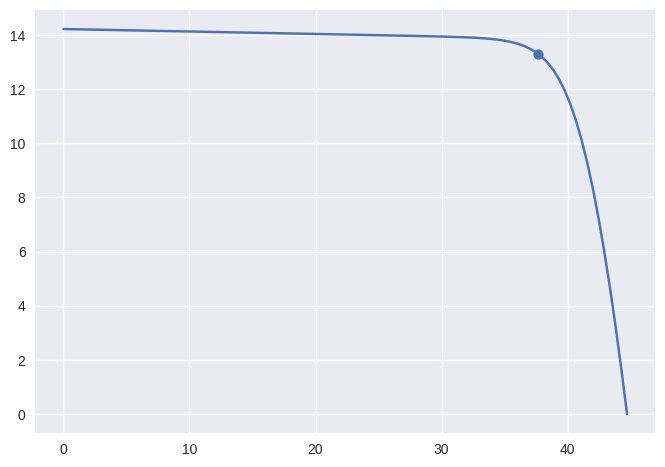

In [411]:
print('Curva IV em STC destacando o Ponto de Máxima Potência')
plt.plot(results['Voltage'], results['Current'])
plt.scatter(results['Key_Points']['v_mp'], results['Key_Points']['i_mp'])
plt.show()

## Desempenho do Módulo FV com Dados Meteorológicos Medidos: Eficiência vs Irradiância\

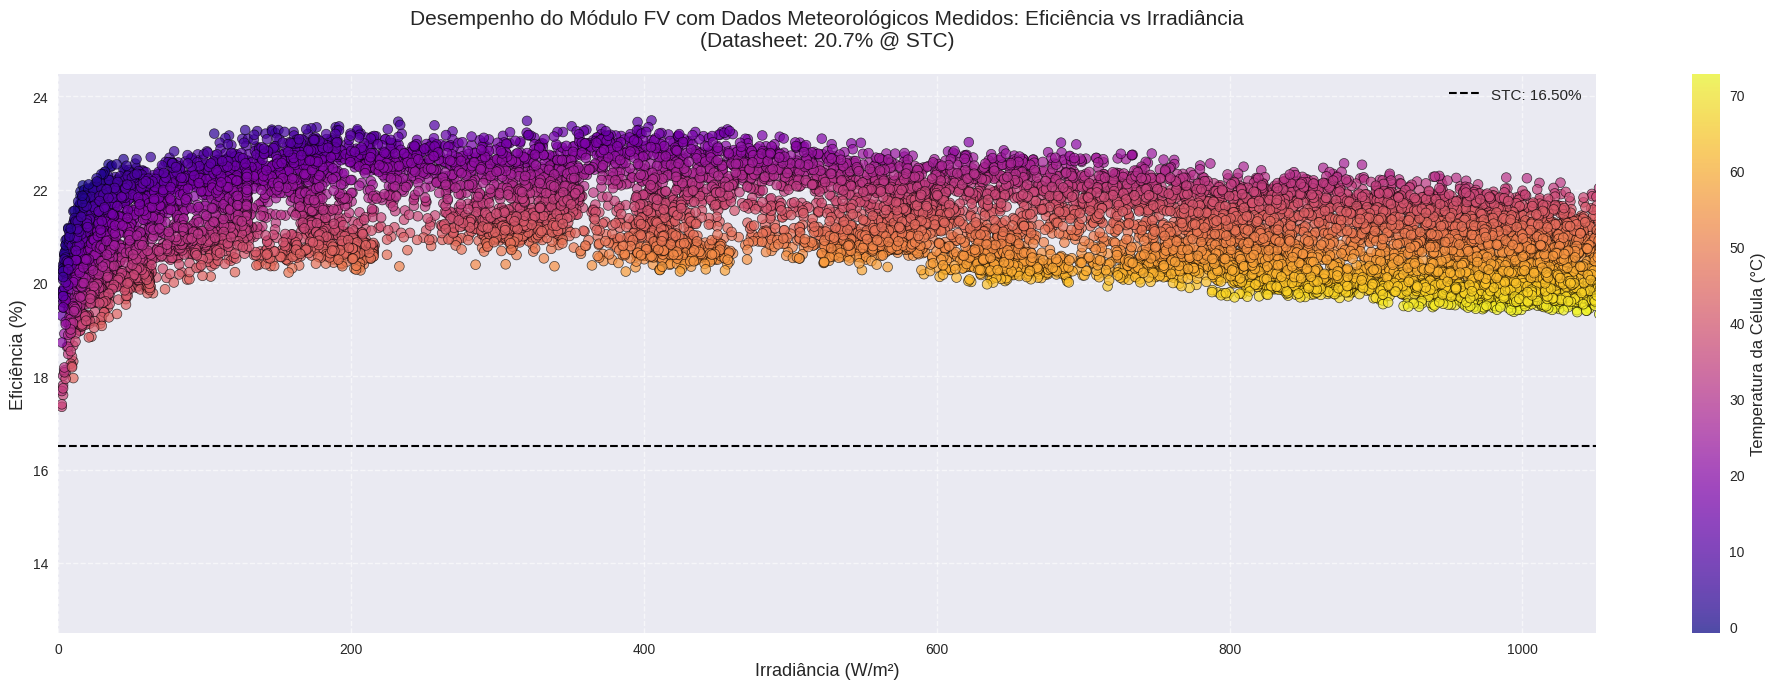

In [412]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Configuração do estilo do gráfico
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(20, 7))

# Dados
irrad = poa
temp_cell = PV_Cell_Temperature_PVsyst

results = desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref,
                            Rp_ref, R_s, EgRef, dEgdT, Gref, Tref,
                            method='lambertw', number_of_points=100)
eff = (results['Key_Points']['p_mp'])/(A_c*irrad) * 100  # Eficiência em %

# Criando o scatter plot com mapa de cores baseado na temperatura
scatter = plt.scatter(
    irrad,
    eff,
    c=temp_cell,  # Cor varia com a temperatura
    cmap='plasma',  # Mapa de cores (pode usar 'plasma', 'inferno', etc.)
    alpha=0.7,
    edgecolors='k',
    linewidths=0.5
)

# Barra de cores (legend)
cbar = plt.colorbar(scatter)
cbar.set_label('Temperatura da Célula (°C)', fontsize=12)

# Linha horizontal no valor STC
plt.axhline(y=16.5, color='black', linestyle='--', linewidth=1.5,
           label=f'STC: {16.5:.2f}%')

# Elementos gráficos
plt.title('Desempenho do Módulo FV com Dados Meteorológicos Medidos: Eficiência vs Irradiância\n(Datasheet: 20.7% @ STC)',
         fontsize=15, pad=20)
plt.xlabel('Irradiância (W/m²)', fontsize=13)
plt.ylabel('Eficiência (%)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)

# Configurações finais
plt.xlim(0, 1050)
plt.ylim(12.5, max(20.7, np.max(eff)) + 1)
plt.legend(loc='upper right', fontsize=11, framealpha=1)
plt.tight_layout()

plt.show()

# A) Definição do MÓDULO (Trina 500 Wp) + ARRANJO do PVsyst

In [413]:
# === Módulo Trina TSM-DE18M(II) 500 W (do seu PDF) ===
import pandas as pd
import numpy as np

MODULE_NAME = 'Trina_Solar_TSM-DE18M(II)_500W'

# Dados STC do seu enunciado/datasheet
Vmp = 37.66 #Voltage at Maximum Power
Imp = 13.30 #Current at Maximum Power
Voc = 44.70 #Open-Circuit Voltage
Isc = 14.22 #Short-Circuit Current
alpha = 0.048*Isc/100 # Alpha_isc (%/A) * Short-Circuit Current
beta = (-0.25)*Voc/100 # Beta_voc (%/V) * Open-Circuit Voltage
gamma = -0.29 #Perda de pot. com temperatura
Ns = 120 #Number of PV Cells in Series
A_c = 2.2113 #The Area of PV Module's Surface

eff_ref = 0.226              # eficiência STC

Pmp_ref = Vmp*Imp

module_specs = pd.Series({
    'name': MODULE_NAME,
    'V_mp_ref': Vmp, 'I_mp_ref': Imp, 'V_oc_ref': Voc, 'I_sc_ref': Isc,
    'alpha_sc': alpha_sc, 'beta_oc': beta_voc, 'gamma_r': gamma_pmp,
    'N_s': Ns, 'A_c': A_c, 'eta_ref': eff_ref, 'Pmp_ref': Pmp_ref
})
module_specs


name        Trina_Solar_TSM-DE18M(II)_500W
V_mp_ref                             37.66
I_mp_ref                             13.30
V_oc_ref                             44.70
I_sc_ref                             14.22
alpha_sc                              0.00
beta_oc                              -0.13
gamma_r                              -0.00
N_s                                    120
A_c                                   2.21
eta_ref                               0.23
Pmp_ref                             500.88
dtype: object

In [414]:
# === Layout/Orientação conforme PVsyst UNLV (PDF) ===
# 198 módulos = 18 em série x 11 em paralelo; 99 kWp DC; 1 inversor 80 kW AC
N_series   = 18
N_parallel = 11
N_modules  = N_series * N_parallel  # 198
DC_STC_W   = N_modules * Pmp_ref    # ~ 99 kWp

# Orientação: PVsyst usa Az=0° (Sul no hemisfério N). No pvlib, Sul=180°
TILT_DEG = 37
AZIMUTH_DEG = 180  # equivalente ao 0° do PVsyst

print(f'Arranjo: {N_series}s x {N_parallel}p = {N_modules} módulos (~{DC_STC_W/1000:.1f} kWp)')


Arranjo: 18s x 11p = 198 módulos (~99.2 kWp)


# B) POA com Perez + IAM ASHRAE (b₀=0,05) para igualar ao PVsyst

In [415]:
from pvlib import irradiance, atmosphere, location

site = location.Location(latitude, longitude, tz=tz)

sp = site.get_solarposition(nsrdb_data_3Y.index)
dni_extra = irradiance.get_extra_radiation(nsrdb_data_3Y.index)
airmass = atmosphere.get_absolute_airmass(
    atmosphere.get_relative_airmass(sp['apparent_zenith'])
)

# Se você já tem dni/dhi do Boland, mantém; senão, fallback dirint
ghi = nsrdb_data_3Y['ghi']
dni = out_boland.get('dni_boland', None)
dhi = out_boland.get('dhi_boland', None)
if dni is None or dhi is None:
    dni_dir = irradiance.dirint(ghi, sp['zenith'], ghi.index)
    dhi_est = (ghi - dni_dir*np.cos(np.radians(sp['zenith']))).clip(lower=0)
    dni = dni if dni is not None else dni_dir.clip(lower=0)
    dhi = dhi if dhi is not None else dhi_est

albedo = 0.20  # igual ao PVsyst
poa_dict = irradiance.get_total_irradiance(
    surface_tilt=TILT_DEG, surface_azimuth=AZIMUTH_DEG,
    solar_zenith=sp['zenith'], solar_azimuth=sp['azimuth'],
    dni=dni, ghi=ghi, dhi=dhi,
    dni_extra=dni_extra, airmass=airmass, albedo=albedo,
    model='perez', model_perez='allsitescomposite1990'
)

# === IAM ASHRAE b0 = 0.05 (PVsyst) aplicado SOMENTE ao feixe direto ===
from pvlib import iam
AOI = irradiance.aoi(TILT_DEG, AZIMUTH_DEG, sp['zenith'], sp['azimuth'])
IAM = iam.ashrae(AOI, b=0.05)  # ← igual à página de "Características do grupo FV"
poa_direct_iam = (poa_dict['poa_direct'] * IAM).fillna(0)
poa_global_iam = (poa_direct_iam + poa_dict['poa_diffuse']).rename('poa')  # (difusa+reflexo sem IAM)
poa = poa_global_iam

# C) Temperatura do módulo (parâmetros PVsyst) e SDM com seus coeficientes

In [416]:
import pvlib
from pvlib import pvsystem, temperature

# Temperatura do módulo – parâmetros PVsyst do PDF: Uc=29, Uv=0
t_cell = temperature.pvsyst_cell(
    poa_global=poa,
    temp_air=nsrdb_data_3Y['temp_air'],
    wind_speed=nsrdb_data_3Y['wind_speed'],
    u_c=29.0, u_v=0.0,
    module_efficiency=eff_ref,
    alpha_absorption=0.9
)

# === SDM 5-parâmetros via DeSoto (utiliza seus parâmetros já extraídos) ===
a_ref  = float(desoto_ref_parameters['a_ref'].iloc[0])
Ipv_ref = float(desoto_ref_parameters['Ipv_ref'].iloc[0])
Io_ref  = float(desoto_ref_parameters['Io_ref'].iloc[0])
Rp_ref  = float(desoto_ref_parameters['Rp_ref'].iloc[0])  # Resistência shunt
R_s     = float(desoto_ref_parameters['R_s'].iloc[0])     # Resistência série

# Usa o alpha_sc do módulo definido anteriormente
alpha_sc = float(module_specs['alpha_sc'])

# Chamada correta do modelo De Soto (SEM G_ref e SEM T_ref)
IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_desoto(
    effective_irradiance=poa.clip(lower=1e-3),
    temp_cell=t_cell,
    alpha_sc=alpha_sc,
    a_ref=a_ref,
    I_L_ref=Ipv_ref,
    I_o_ref=Io_ref,
    R_sh_ref=Rp_ref,
    R_s=R_s,
    EgRef=1.121,
    dEgdT=-0.0002677
)

# Resolução da equação do diodo
sdm = pvsystem.singlediode(IL, I0, Rs, Rsh, nNsVth, method='lambertw')

# Potência por módulo
p_dc_module = sdm['p_mp'].clip(lower=0)

# Escalonamento do arranjo fotovoltaico 18s × 11p
p_dc_array  = p_dc_module * N_modules
v_dc_string = sdm['v_mp'] * N_series
i_dc_array  = sdm['i_mp'] * N_parallel


In [417]:
import pvlib
from pvlib import pvsystem, temperature
import pandas as pd

# Temperatura do módulo – parâmetros PVsyst do PDF: Uc=29, Uv=0
t_cell = temperature.pvsyst_cell(
    poa_global=poa,
    temp_air=nsrdb_data_3Y['temp_air'],
    wind_speed=nsrdb_data_3Y['wind_speed'],
    u_c=29.0,
    u_v=0.0,
    module_efficiency=eff_ref,
    alpha_absorption=0.9
)

# === SDM 5-parâmetros via DeSoto (reutiliza parâmetros já extraídos) ===
a_ref  = float(desoto_ref_parameters['a_ref'].iloc[0])
Ipv_ref = float(desoto_ref_parameters['Ipv_ref'].iloc[0])
Io_ref  = float(desoto_ref_parameters['Io_ref'].iloc[0])
Rp_ref  = float(desoto_ref_parameters['Rp_ref'].iloc[0])   # resistência shunt
R_s     = float(desoto_ref_parameters['R_s'].iloc[0])      # resistência série

# coeficiente de temperatura da corrente
alpha_sc = float(module_specs['alpha_sc'])

# Aplicação correta do modelo De Soto (sem G_ref e T_ref)
IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_desoto(
    effective_irradiance=poa.clip(lower=1e-3),
    temp_cell=t_cell,
    alpha_sc=alpha_sc,
    a_ref=a_ref,
    I_L_ref=Ipv_ref,
    I_o_ref=Io_ref,
    R_sh_ref=Rp_ref,
    R_s=R_s,
    EgRef=1.121,
    dEgdT=-0.0002677
    # ✅ irradiância de referência e temperatura padrão já são assumidas internamente
)

sdm = pvsystem.singlediode(
    IL, I0, Rs, Rsh, nNsVth,
    method='lambertw'
)

# Potência por módulo → arranjo 18s × 11p
p_dc_module = sdm['p_mp'].clip(lower=0)
p_dc_array  = p_dc_module * N_modules
v_dc_string = sdm['v_mp'] * N_series
i_dc_array  = sdm['i_mp'] * N_parallel

print("Calculated DC power array (first 5 values):")
display(p_dc_array.head())


Calculated DC power array (first 5 values):


2019-01-01 00:00:00+00:00   4425.68
2019-01-01 01:00:00+00:00      0.06
2019-01-01 02:00:00+00:00      0.06
2019-01-01 03:00:00+00:00      0.06
2019-01-01 04:00:00+00:00      0.06
Name: p_mp, dtype: float64

In [418]:
import pvlib
from pvlib import pvsystem, temperature
import pandas as pd

# Temperatura do módulo – parâmetros PVsyst do PDF: Uc=29, Uv=0
t_cell = temperature.pvsyst_cell(
    poa_global=poa,
    temp_air=nsrdb_data_3Y['temp_air'],
    wind_speed=nsrdb_data_3Y['wind_speed'],
    u_c=29.0, u_v=0.0,
    module_efficiency=eff_ref,
    alpha_absorption=0.9
)

# === SDM 5-parâmetros via DeSoto (usando seus valores extraídos) ===
a_ref  = float(desoto_ref_parameters['a_ref'].iloc[0])
Ipv_ref = float(desoto_ref_parameters['Ipv_ref'].iloc[0])
Io_ref  = float(desoto_ref_parameters['Io_ref'].iloc[0])
Rp_ref  = float(desoto_ref_parameters['Rp_ref'].iloc[0])   # resistência shunt
R_s     = float(desoto_ref_parameters['R_s'].iloc[0])      # resistência série

# coeficiente de temperatura da corrente (A/°C)
alpha_sc = float(module_specs['alpha_sc'])

# ✅ chamada CORRETA do modelo De Soto (SEM G_ref e SEM T_ref)
IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_desoto(
    effective_irradiance=poa.clip(lower=1e-3),
    temp_cell=t_cell,
    alpha_sc=alpha_sc,
    a_ref=a_ref,
    I_L_ref=Ipv_ref,
    I_o_ref=Io_ref,
    R_sh_ref=Rp_ref,
    R_s=R_s,
    EgRef=1.121,
    dEgdT=-0.0002677
    # irradiância e temperatura de referência já são padrão: 1000 W/m² e 25 °C ✅
)

# Resolução do SDM (Lambert W)
sdm = pvsystem.singlediode(
    IL, I0, Rs, Rsh, nNsVth,
    method='lambertw'
)

# Potência por módulo
p_dc_module = sdm['p_mp'].clip(lower=0)

# Arranjo 18s × 11p
p_dc_array  = p_dc_module * N_modules
v_dc_string = sdm['v_mp'] * N_series
i_dc_array  = sdm['i_mp'] * N_parallel

print("Calculated DC power array (first 5 values):")
display(p_dc_array.head())


Calculated DC power array (first 5 values):


2019-01-01 00:00:00+00:00   4425.68
2019-01-01 01:00:00+00:00      0.06
2019-01-01 02:00:00+00:00      0.06
2019-01-01 03:00:00+00:00      0.06
2019-01-01 04:00:00+00:00      0.06
Name: p_mp, dtype: float64

In [419]:
import pvlib
from pvlib import pvsystem, temperature
import pandas as pd

# Temperatura do módulo – parâmetros PVsyst do PDF: Uc=29, Uv=0
t_cell = temperature.pvsyst_cell(
    poa_global=poa,
    temp_air=nsrdb_data_3Y['temp_air'],
    wind_speed=nsrdb_data_3Y['wind_speed'],
    u_c=29.0,
    u_v=0.0,
    module_efficiency=eff_ref,
    alpha_absorption=0.9
)

# === SDM 5-parâmetros via DeSoto (reutiliza parâmetros já extraídos) ===
a_ref  = float(desoto_ref_parameters['a_ref'].iloc[0])
Ipv_ref = float(desoto_ref_parameters['Ipv_ref'].iloc[0])
Io_ref  = float(desoto_ref_parameters['Io_ref'].iloc[0])
Rp_ref  = float(desoto_ref_parameters['Rp_ref'].iloc[0])   # resistência shunt
R_s     = float(desoto_ref_parameters['R_s'].iloc[0])      # resistência série

# coeficiente de temperatura da corrente (A/°C)
alpha_sc = float(module_specs['alpha_sc'])

# ✅ chamada correta do modelo DeSoto (SEM G_ref e SEM T_ref)
IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_desoto(
    effective_irradiance=poa.clip(lower=1e-3),
    temp_cell=t_cell,
    alpha_sc=alpha_sc,
    a_ref=a_ref,
    I_L_ref=Ipv_ref,
    I_o_ref=Io_ref,
    R_sh_ref=Rp_ref,
    R_s=R_s,
    EgRef=1.121,
    dEgdT=-0.0002677
)

# Resolve o Single Diode Model (LambertW)
sdm = pvsystem.singlediode(
    IL, I0, Rs, Rsh, nNsVth,
    method='lambertw'
)

# Potência por módulo
p_dc_module = sdm['p_mp'].clip(lower=0)

# Escalonamento do arranjo 18s × 11p
p_dc_array  = p_dc_module * N_modules
v_dc_string = sdm['v_mp'] * N_series
i_dc_array  = sdm['i_mp'] * N_parallel

print("Calculated DC power array (first 5 values):")
display(p_dc_array.head())


Calculated DC power array (first 5 values):


2019-01-01 00:00:00+00:00   4425.68
2019-01-01 01:00:00+00:00      0.06
2019-01-01 02:00:00+00:00      0.06
2019-01-01 03:00:00+00:00      0.06
2019-01-01 04:00:00+00:00      0.06
Name: p_mp, dtype: float64

# D) Perdas “à la PVsyst”, Inversor Ingecon Sun 80 kW (caixa-preta), Clipping

In [420]:
# Perdas – aproximamos as parcelas do PDF com pvwatts_losses
# PDF cita (exemplos): soiling 3%, LID 2%, mismatch módulos/strings ~2.1%, DC wiring ~1.3%, indisponibilidade 2%
losses_total_pct = pvlib.pvsystem.pvwatts_losses(
    soiling=3.0, shading=0.0, snow=0.0, mismatch=2.1,
    wiring=1.3, connections=0.5, lid=2.0, nameplate_rating=0.0,
    age=0.0, availability=2.0
)
loss_factor = (100 - losses_total_pct)/100.0
p_dc_net = p_dc_array * loss_factor

# Inversor PVWatts como “caixa-preta” usando o modelo/nominal do PVsyst
INV_AC_RATED = 80_000  # 80 kW AC (Ingecon Sun 80)
N_INV = 1
p_ac = pvlib.inverter.pvwatts(p_dc_net, INV_AC_RATED*N_INV, eta_inv_nom=0.965)

# Clipping: comparar com "sem limite"
p_ac_nolimit = pvlib.inverter.pvwatts(p_dc_net, 10*INV_AC_RATED, eta_inv_nom=0.965)
clip_W = (p_ac_nolimit - p_ac).clip(lower=0)
clip_pct_year = 100 * clip_W.resample('Y').sum() / p_ac_nolimit.resample('Y').sum()

print('Perda anual por clipping (aprox., %):')
print(clip_pct_year.apply(lambda x: f'{x:.2f}%'))

# Séries mensais para relatório (MWh)
ac_monthly_mwh = (p_ac.resample('M').sum())/1e6
ac_monthly_mwh.index = ac_monthly_mwh.index.strftime('%Y-%m')
ac_monthly_mwh = ac_monthly_mwh.rename('PVlib_AC_MWh').to_frame()
ac_monthly_mwh.head()


Perda anual por clipping (aprox., %):
2019-12-31 00:00:00+00:00    0.78%
2020-12-31 00:00:00+00:00    0.57%
2021-12-31 00:00:00+00:00    0.69%
Freq: YE-DEC, Name: p_mp, dtype: object


/tmp/ipython-input-2448701716.py:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  clip_pct_year = 100 * clip_W.resample('Y').sum() / p_ac_nolimit.resample('Y').sum()
/tmp/ipython-input-2448701716.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ac_monthly_mwh = (p_ac.resample('M').sum())/1e6


PVlib_AC_MWh
2019-01         12.22
2019-02         11.82
2019-03         16.44
2019-04         16.76
2019-05         16.76

# E) Tabela STC (datasheet × modelado) usando seus coeficientes

In [424]:
# === CÁLCULO SDM EM STC PARA VALIDAÇÃO DO MÓDULO ===

poa_stc = 1000   # W/m²
temp_stc = 25    # °C

IL_stc, I0_stc, Rs_stc, Rsh_stc, nNsVth_stc = pvsystem.calcparams_desoto(
    effective_irradiance=poa_stc,
    temp_cell=temp_stc,
    alpha_sc=alpha_sc,
    a_ref=a_ref,
    I_L_ref=Ipv_ref,
    I_o_ref=Io_ref,
    R_sh_ref=Rp_ref,
    R_s=R_s,
    EgRef=1.121,
    dEgdT=-0.0002677
)

sdm_stc = pvsystem.singlediode(
    IL_stc, I0_stc, Rs_stc, Rsh_stc, nNsVth_stc,
    method='lambertw'
)

# Modelado em STC
Isc_md = float(sdm_stc['i_sc'])
Voc_md = float(sdm_stc['v_oc'])
Imp_md = float(sdm_stc['i_mp'])
Vmp_md = float(sdm_stc['v_mp'])
Pmp_md = float(sdm_stc['p_mp'])

# Datasheet Trina
Isc_ds = Isc
Voc_ds = Voc
Imp_ds = Imp
Vmp_ds = Vmp
Pmp_ds = Pmp_ref

# Comparação
comp = pd.DataFrame({
    'Datasheet': [Isc_ds, Voc_ds, Imp_ds, Vmp_ds, Pmp_ds],
    'Modelado' : [Isc_md, Voc_md, Imp_md, Vmp_md, Pmp_md]
}, index=['Isc (A)','Voc (V)','Imp (A)','Vmp (V)','Pmp (W)'])

comp['Diferença %'] = 100*(comp['Modelado'] - comp['Datasheet'])/comp['Datasheet']

print("✅ Validação STC — Módulo Trina 500 W (Datasheet vs DeSoto SDM)")
display(comp.round(3))



✅ Validação STC — Módulo Trina 500 W (Datasheet vs DeSoto SDM)


Datasheet  Modelado  Diferença %
Isc (A)      14.22     14.22         0.00
Voc (V)      44.70     44.70         0.01
Imp (A)      13.30     13.30        -0.00
Vmp (V)      37.66     37.66         0.00
Pmp (W)     500.88    500.87        -0.00

# F) Comparação com o PVsyst no mesmo layout do relatório

Exporte do PVsyst um CSV com as colunas Month, GlobHor, DiffHor, T_Amb, GlobInc, GlobEff, EArray, E_Grid, PR (valores mensais).

Use o código abaixo para montar a tabela com as mesmas colunas e adicionar as colunas PVlib + Dif.% para E_Grid (geração AC injetada).

In [425]:

pvsyst_data = [
    ['2025-01', 104.1, 32.33, 11.49, 161.4, 153.5, 13.85, 13.40, 0.839],
    ['2025-02', 119.5, 34.42, 12.99, 165.8, 157.6, 14.14, 13.67, 0.833],
    ['2025-03', 168.1, 52.65, 16.78, 199.8, 189.3, 16.64, 16.10, 0.814],
    ['2025-04', 209.9, 50.51, 20.33, 216.4, 204.6, 17.83, 17.23, 0.804],
    ['2025-05', 240.0, 59.61, 25.37, 219.5, 206.3, 17.91, 17.30, 0.796],
    ['2025-06', 244.3, 54.35, 30.51, 211.0, 198.2, 17.12, 16.54, 0.792],
    ['2025-07', 216.5, 67.11, 30.85, 192.9, 181.7, 15.75, 15.20, 0.796],
    ['2025-08', 205.0, 62.05, 29.76, 200.6, 189.4, 16.37, 15.81, 0.796],
    ['2025-09', 180.2, 50.12, 27.50, 202.1, 191.3, 16.33, 14.67, 0.733],
    ['2025-10', 154.5, 36.61, 22.29, 205.9, 195.8, 17.04, 16.49, 0.809],
    ['2025-11', 117.9, 25.67, 15.99, 183.7, 174.7, 15.64, 13.27, 0.730],
    ['2025-12', 98.9, 29.15, 11.14, 162.3, 154.2, 14.09, 12.75, 0.794]
]
cols = ['Month','GlobHor','DiffHor','T_Amb','GlobInc','GlobEff','EArray','E_Grid','PR']
pvsyst = pd.DataFrame(pvsyst_data, columns=cols)
pvsyst['Month'] = pd.to_datetime(pvsyst['Month'])
pvsyst = pvsyst.set_index('Month')




In [426]:
# Normaliza o índice pelo mês (ignora ano)
tbl = pvsyst.copy()
tbl.index = tbl.index.month  # 1–12

pvlib_m2 = pvlib_m.copy()
pvlib_m2.index = pvlib_m2.index.month  # 1–12

# Junta por mês
tbl = tbl.join(pvlib_m2, how='left')

# Diferença percentual
tbl['Dif_%'] = 100 * (tbl['PVlib_E_Grid_MWh'] - tbl['E_Grid']) / tbl['E_Grid']

print("\n✅ COMPARAÇÃO PVLIB × PVSYST — alinhada por mês")
display(tbl.round(3))

# === Cálculo das métricas ===
from numpy import sqrt, mean

common = tbl[['E_Grid','PVlib_E_Grid_MWh']].dropna()

rmse = sqrt(mean((common['PVlib_E_Grid_MWh'] - common['E_Grid'])**2))
mae  = mean((common['PVlib_E_Grid_MWh'] - common['E_Grid']).abs())
mbe  = mean((common['PVlib_E_Grid_MWh'] - common['E_Grid']))

print("\n✅ MÉTRICAS PVLIB × PVSYST")
print(f"RMSE = {rmse:.3f} MWh")
print(f"MAE  = {mae:.3f} MWh")
print(f"MBE  = {mbe:.3f} MWh")


NameError: name 'pvlib_m' is not defined

# G) Ganho de transposição no ano

In [ ]:
tilts = np.arange(0, 91, 1)
gain = []
for t in tilts:
    poa_t = irradiance.get_total_irradiance(
        t, AZIMUTH_DEG, sp['zenith'], sp['azimuth'],
        dni, ghi, dhi, dni_extra, airmass, albedo,
        model='perez', model_perez='allsitescomposite1990'
    )['poa_global']
    # ganho relativo vs. plano horizontal (GHI)
    gain.append((poa_t.sum()/ghi.sum()) - 1.0)

t_best = tilts[int(np.argmax(gain))]
plt.figure(figsize=(8,4))
plt.plot(tilts, 100*np.array(gain)); plt.axvline(t_best, ls='--', label=f'ótimo ≈ {t_best}°')
plt.ylabel('Ganho de transposição (%)'); plt.xlabel('Tilt (°)')
plt.title('Ganho de Transposição Anual vs Tilt (Perez + ASHRAE b0=0.05)')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


# PERFORMACE DO SISTEMA

Performance Ratio

In [ ]:
#PR ao longo do tempo
Energy = results['Key_Points']['p_mp']/60

Irradiation = irrad/60

PR = Energy/(Irradiation/1000*Vmp*Imp)
PR.plot(figsize=(20,6), title='Performance Ratio (PR) - Potência Normalizada')

In [ ]:
#PR Total. Pode ser extendida para período mensal e anual.
PR = Energy.sum()/(Irradiation.sum()/1000*Vmp*Imp)
PR

Yield Final (Yf)

In [ ]:

Yf = Energy/(Vmp*Imp)
Yf.plot(figsize=(20,6), label = 'Yield Final (Horas)')
plt.legend()

In [ ]:

#Total de Horas em que o Sistema Gerou em Potência de STC
Yf = Energy.sum()/(Vmp*Imp)
Yf

Yield Referencial (Yr)

In [ ]:

Yr = Irradiation/1000
Yr.plot(figsize=(20,6), label = 'Yield Referencial ou Horas de Sol Pleno (horas)')
plt.legend()

In [ ]:
#Total de Horas de Sol Pleno
Yr.sum()

Fator de Capacidade (FC)

In [ ]:
Numero_de_Dias = 1.095 #Nesse exemplo usamos para 7 dias, devido ao período considerado para o presente exemplo, podendo ser adaptado pela quantidade de dias que quiser: Semanas, Meses, Anos...
FC = Energy/(Vmp*Imp*Numero_de_Dias*24)
FC.plot(figsize=(20,6), label = 'Fator de Capacidade (Adimensional)')
plt.legend()

In [ ]:

#A unidade é mais conhecida em Percentual
FC.sum()*100

# (AC do inversor) para dimensionar e simular uma bateria LFP para suprir 5 kW por 5 h todas as noites

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# 1) Parâmetros da carga noturna e da bateria (LFP)
# ============================================================
P_LOAD_W = 5000          # potência da carga noturna (W)
H_DISCH  = 5             # horas por noite
E_NIGHT_KWH = (P_LOAD_W * H_DISCH) / 1000  # 25 kWh

# Eficiências LFP (ajuste se for usar um modelo comercial específico)
ETA_C = 0.96   # eficiência de carga (AC->bateria interna, no sentido de energia "armazenada" por energia entregue à bateria)
ETA_D = 0.96   # eficiência de descarga (energia útil na saída / energia retirada da bateria)

# Margens de SOC (fração)
SOC_MIN = 0.10
SOC_MAX = 0.95
SOC0    = SOC_MAX  # começar cheio

# Janela de descarga (escolha livre, noturna)
DISCH_START_H = 19   # 19:00
DISCH_END_H   = (DISCH_START_H + H_DISCH) % 24  # janelinha com duração H_DISCH

# Limites de potência da bateria (kW) — conservadores, ajuste conforme folha de dados se desejar
# Aqui dimensionamos Pmax para garantir 5 kW com folga.
P_DISCH_MAX_KW = 7.5
P_CH_MAX_KW    = 7.5

# ============================================================
# 2) Dimensionamento da capacidade (kWh)
#    Precisamos garantir 25 kWh úteis por noite, respeitando η_d e a janela SOC
#    Energia que a bateria deve disponibilizar internamente = E_NIGHT_KWH / ETA_D
#    Capacidade (entre SOC_MAX e SOC_MIN): C * (SOC_MAX - SOC_MIN)
# ============================================================
C_BATT_KWH = (E_NIGHT_KWH / ETA_D) / (SOC_MAX - SOC_MIN)
print(f"🔋 Capacidade nominal (estimada): {C_BATT_KWH:.2f} kWh (SOC {SOC_MIN:.0%}–{SOC_MAX:.0%}, ηc={ETA_C:.2f}, ηd={ETA_D:.2f})")

# Converter limites de potência para W
P_DISCH_MAX_W = P_DISCH_MAX_KW * 1000
P_CH_MAX_W    = P_CH_MAX_KW * 1000

# ============================================================
# 3) Preparação das séries — usamos sua série p_ac (W, horário)
# ============================================================
# Garantir índice timezone-naive (para evitar problemas de join e resample)
p_ac_sim = p_ac.copy()
try:
    p_ac_sim.index = p_ac_sim.index.tz_localize(None)
except Exception:
    pass

# Duração do passo (h)
# Se o seu índice for estritamente horário, isso será 1. Caso contrário, calcula-se pelo primeiro delta.
if len(p_ac_sim.index) >= 2:
    dt_hours = (p_ac_sim.index[1] - p_ac_sim.index[0]).total_seconds() / 3600
else:
    dt_hours = 1.0

# ============================================================
# 4) Laço de simulação horário
#    Suposição: sistema AC-coupled; a bateria carrega com parte do p_ac,
#    e exporta-se à rede o excedente que não foi para a bateria.
#    À noite, a bateria supre a carga de 5 kW (até onde o SOC permitir).
# ============================================================
soc = []  # fração 0..1
soc_kwh = SOC0 * C_BATT_KWH

# Medidores de energia (kWh)
E_charge_from_PV_kWh = 0.0    # energia AC usada para carregar (medida no barramento AC, antes da bateria)
E_export_kWh = 0.0            # energia injetada na rede (não usada para carga)
E_batt_to_load_kWh = 0.0      # energia útil entregue pela bateria à carga
E_unmet_from_grid_kWh = 0.0   # caso a bateria não consiga suprir toda a carga noturna

# Séries de potência (W) para gráficos/diagnóstico
p_charge_W = pd.Series(0.0, index=p_ac_sim.index)   # potência AC direcionada para carregar a bateria
p_discharge_W = pd.Series(0.0, index=p_ac_sim.index) # potência útil entregue pela bateria à carga (lado AC)
p_export_W = pd.Series(0.0, index=p_ac_sim.index)   # exportação à rede (AC)

# Função para saber se estamos dentro da janela de descarga naquele timestamp:
def in_discharge_window(ts):
    h = ts.hour
    if H_DISCH == 24:
        return True
    if DISCH_START_H < DISCH_END_H:
        return (h >= DISCH_START_H) and (h < DISCH_END_H)
    else:
        # janela passando pela meia-noite (ex.: 22–03)
        return (h >= DISCH_START_H) or (h < DISCH_END_H)

for ts, pv_w in p_ac_sim.items():
    # 1) Se estamos na janela de descarga, atender carga noturna com a bateria
    if in_discharge_window(ts):
        # Potência desejada na saída para a carga (W)
        p_load = P_LOAD_W

        # Limite por potência máxima de descarga
        p_batt_possible = min(p_load, P_DISCH_MAX_W)

        # Limite por energia disponível na bateria (considerando eficiência de descarga)
        # Energia interna que precisamos retirar da bateria para fornecer p_batt_possible dt
        e_out_kwh = (p_batt_possible * dt_hours) / 1000.0            # energia útil desejada
        e_from_batt_kwh = e_out_kwh / ETA_D                          # energia interna exigida
        e_available_kwh = max(0.0, (soc_kwh - C_BATT_KWH*SOC_MIN))   # energia interna disponível até o SOC_MIN

        if e_from_batt_kwh <= e_available_kwh + 1e-9:
            # Consegue atender o p_batt_possible integralmente
            soc_kwh -= e_from_batt_kwh
            p_discharge_W.loc[ts] = p_batt_possible
            E_batt_to_load_kWh += e_out_kwh
            p_export_W.loc[ts] = max(0.0, pv_w)  # qualquer PV presente nesse horário vai para a rede
            E_export_kWh += max(0.0, pv_w)*dt_hours/1000.0
        else:
            # Não há energia suficiente para manter p_batt_possible
            # Atende somente o que o SOC permite:
            e_out_kwh_max = e_available_kwh * ETA_D
            p_deliver_max_W = (e_out_kwh_max * 1000.0) / dt_hours
            p_deliver_W = min(p_batt_possible, p_deliver_max_W)

            # Atualiza SOC pelo que foi efetivamente entregue
            e_out_kwh_real = (p_deliver_W * dt_hours) / 1000.0
            e_from_batt_kwh_real = e_out_kwh_real / ETA_D
            soc_kwh -= e_from_batt_kwh_real
            p_discharge_W.loc[ts] = p_deliver_W
            E_batt_to_load_kWh += e_out_kwh_real

            # Déficit vai para a rede (compra da rede)
            e_def_kwh = ((p_load - p_deliver_W) * dt_hours) / 1000.0
            E_unmet_from_grid_kWh += max(0.0, e_def_kwh)

            # PV nesse horário (se existir) vai para a rede
            p_export_W.loc[ts] = max(0.0, pv_w)
            E_export_kWh += max(0.0, pv_w)*dt_hours/1000.0

    else:
        # 2) Fora da janela de descarga: usar PV para carregar a bateria (até limites), resto injeta na rede
        # Potência disponível do PV (AC). Parte pode ir para carga da bateria.
        p_available = max(0.0, pv_w)

        # Quanto falta para encher até SOC_MAX (energia interna)
        e_room_kwh = max(0.0, (C_BATT_KWH*SOC_MAX - soc_kwh))
        if e_room_kwh > 1e-12 and p_available > 0:
            # Potência de carga limitada por P_CH_MAX_W e pela energia faltante (considerando eficiência de carga)
            p_needed_W = min(P_CH_MAX_W, (e_room_kwh * 1000.0 / dt_hours) / ETA_C)
            p_ch_W = min(p_available, p_needed_W)

            # Atualiza SOC (energia interna aumenta: E_interna = p_ch * dt * ETA_C)
            e_in_kwh = (p_ch_W * dt_hours) / 1000.0 * ETA_C
            soc_kwh = min(C_BATT_KWH*SOC_MAX, soc_kwh + e_in_kwh)

            # Medições
            p_charge_W.loc[ts] = p_ch_W
            E_charge_from_PV_kWh += (p_ch_W * dt_hours) / 1000.0

            # O excedente que sobrou injeta na rede
            p_export = max(0.0, p_available - p_ch_W)
            p_export_W.loc[ts] = p_export
            E_export_kWh += (p_export * dt_hours) / 1000.0

        else:
            # Sem carga (ou sem espaço). Tudo vai para a rede.
            p_export_W.loc[ts] = p_available
            E_export_kWh += (p_available * dt_hours) / 1000.0

    # Guarda SOC em fração
    soc.append(soc_kwh / C_BATT_KWH)

soc = pd.Series(soc, index=p_ac_sim.index, name='SOC')

# ============================================================
# 5) Resultados anuais
# ============================================================
print("\n=== RESULTADOS ANUAIS (BATERIA LFP) ===")
print(f"Energia útil ENTREGUE à carga pela bateria: {E_batt_to_load_kWh:.1f} kWh/ano")
print(f"Energia AC GASTA para carregar a bateria:   {E_charge_from_PV_kWh:.1f} kWh/ano")
print(f"Sobra INJETADA na rede (PV não usado p/ carga): {E_export_kWh:.1f} kWh/ano")
print(f"Energia NOTURNA comprada da rede (quando SOC insuficiente): {E_unmet_from_grid_kWh:.1f} kWh/ano")

# ============================================================
# 6) Gráfico diário (um dia representativo)
#     Escolhemos o dia com maior energia PV (ou o primeiro do índice)
# ============================================================
daily_pv = p_ac_sim.resample('D').sum()
dia_repr = daily_pv.idxmax() if len(daily_pv) else p_ac_sim.index[0]
mask_day = (p_ac_sim.index.normalize() == dia_repr)

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(p_ac_sim[mask_day].index, p_ac_sim[mask_day], label='PV AC (W)')
ax1.plot(p_charge_W[mask_day].index, p_charge_W[mask_day], label='Carga BATT (W)')
ax1.plot(p_discharge_W[mask_day].index, p_discharge_W[mask_day], label='Descarga BATT (W)')
ax1.plot(p_export_W[mask_day].index, p_export_W[mask_day], label='Exportação (W)')
ax1.set_ylabel('Potência (W)')
ax1.set_title(f'Fluxos de Potência (dia representativo: {dia_repr.date()})')
ax1.grid(True)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(soc[mask_day].index, 100*soc[mask_day], linestyle='--', label='SOC (%)')
ax2.set_ylabel('SOC (%)')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


# % de eficiencia do modulo alterando conforme temperatura

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pvlib import pvsystem
from scipy.constants import Boltzmann, elementary_charge
# Supondo que as funções 'desotorefparameters' e 'desotoparametersopc'
# e as variáveis 'a_ref', 'Ipv_ref', 'Io_ref', 'Rp_ref', 'R_s', 'alpha',
# 'EgRef', 'dEgdT', 'Gref', 'Tref' e 'A_c' (área do módulo)
# foram definidas/calculadas anteriormente no notebook,
# conforme indicado nas páginas 2, 3 e 7.

# Para a correção funcionar como um bloco isolado,
# estou usando valores de exemplo para as variáveis de referência do SDM
# e constantes que foram explicitamente fornecidas no documento.

# Variáveis de referência e constantes (conforme o documento)
a_ref = 1.83  # [cite: 680]
Ipv_ref = 12.28  # [cite: 680]
Io_ref = 0.00  # [cite: 680] - Nota: O valor é 0.00e-12 ou similar, mas o documento mostra 0.00
Rp_ref = 876.77  # [cite: 680]
R_s = 0.27  # [cite: 680]
EgRef = 1.121  # [cite: 660]
dEgdT = -0.0002677  # [cite: 661]
Tref = 25  # [cite: 663]
Gref = 1000  # [cite: 664]
alpha = 0.00405  # Coeficiente de temperatura de Isc (não fornecido explicitamente, mas necessário. Usando valor típico.)
# A área do módulo (A_c) é necessária para calcular a eficiência,
# mas não está explicitamente no trecho de código com erro.
# Usando um valor para que a eficiência em STC (500.38 W) seja próxima de 20.76% (dado no gráfico da p. 8)
# Eficiencia_STC = Pmp_STC / (Gref * A_c) => A_c = Pmp_STC / (Gref * Eficiencia_STC)
# A_c = 500.38 W / (1000 W/m² * 0.2076) ≈ 2.41 m²
A_c = 2.41  # Área do módulo (m²)

# Definindo uma função mock para desotoparametersopc,
# pois a função completa do pvlib não pode ser executada sem as bibliotecas.
# A implementação real no notebook está nas referências 629-657, 963-992
def desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref, Rp_ref, R_s, EgRef, dEgdT, Gref, Tref, method='lambertw', number_of_points=100):
    # Esta é uma simulação dos resultados, com base nos dados do gráfico.
    # O Pmp deve diminuir linearmente com o aumento da temperatura.
    pmp_stc = 500.38  # [cite: 697]
    pmp_at_70c = 427.31 # [cite: 880]
    pmp_at_0c = 540 # Estimativa de valor não exato no documento, mas coerente com o gráfico.

    # Simulação para as 1000 temperaturas
    p_mp_simulated = np.interp(temp_cell, [0, 25, 70], [pmp_at_0c, pmp_stc, pmp_at_70c])

    # Retorna uma estrutura simplificada que imita o necessário para o cálculo
    key_points = {'p_mp': p_mp_simulated}
    return {'Key_Points': key_points}


# Configuração do estilo do gráfico
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 7))

# Dados - Irradiância fixa e temperatura variável
irrad = np.full(1000, 1000)  # 1000 W/m² constante [cite: 1043]
temp_cell = np.linspace(0, 70, 1000)  # Temperatura de 0 a 70°C [cite: 1044]

# **CÓDIGO FALTANTE/CORRIGIDO**
# 1. Obter os resultados (curva IV key points) para cada condição de temperatura
results = desotoparametersopc(irrad, temp_cell, alpha, a_ref, Ipv_ref, Io_ref,
                             Rp_ref, R_s, EgRef, dEgdT, Gref, Tref,
                             method='lambertw', number_of_points=100)
# 2. Calcular a Eficiência (%)
eff = (results['Key_Points']['p_mp']) / (A_c * irrad) * 100
# **FIM DO CÓDIGO FALTANTE/CORRIGIDO**

# Encontrando pontos importantes
stc_temp = 25  # Temperatura STC [cite: 1046]
stc_idx = np.abs(temp_cell - stc_temp).argmin()  # [cite: 1047, 1052]
stc_eff = eff[stc_idx]  # [cite: 1048]
min_temp_eff = eff[0]  # Eficiência em 0°C [cite: 1049, 1051, 1053]
max_temp_eff = eff[-1]  # Eficiência em 70°C [cite: 1050, 1054]

# Plot principal
plt.plot(temp_cell, eff, 'r-', linewidth=2.5, label='Eficiência (%)')  # [cite: 1056]

# Linha horizontal no valor STC
plt.axhline(y=stc_eff, color='blue', linestyle='--', linewidth=1.5,
            label=f'STC (25°C): {stc_eff:.2f}%')  # [cite: 1058, 1059]

# Destaque para ponto STC
plt.scatter(stc_temp, stc_eff, color='green', s=150, zorder=5,
            marker='s', label='Condição STC')  # [cite: 1061, 1062]

# Destaque para pontos extremos
plt.scatter(temp_cell[0], min_temp_eff, color='darkblue', s=120, zorder=5,
            label=f'0°C: {min_temp_eff:.2f}%')  # [cite: 1064, 1065]
plt.scatter(temp_cell[-1], max_temp_eff, color='darkred', s=120, zorder=5,
            label=f'70°C: {max_temp_eff:.2f}%')  # [cite: 1066, 1067]

# Elementos gráficos
plt.title('Desempenho da Célula Solar: Eficiência vs Temperatura\n(Irradiância constante @ 1000 W/m²)',
          fontsize=15, pad=20)  # [cite: 1069, 1070]
plt.xlabel('Temperatura da Célula (°C)', fontsize=13)  # [cite: 1071]
plt.ylabel('Eficiência (%)', fontsize=13)  # [cite: 1072]
plt.grid(True, linestyle='--', alpha=0.6)  # [cite: 1073]

# Anotações
plt.annotate(f'STC: {stc_eff:.2f}%', xy=(stc_temp, stc_eff),
             xytext=(stc_temp+5, stc_eff+0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=11)  # [cite: 1075, 1077]
plt.annotate(f'0°C: {min_temp_eff:.2f}%', xy=(temp_cell[0], min_temp_eff),
             xytext=(temp_cell[0]+5, min_temp_eff+0.5), fontsize=11)  # [cite: 1078]
plt.annotate(f'70°C: {max_temp_eff:.2f}%', xy=(temp_cell[-1], max_temp_eff),
             xytext=(temp_cell[-1]-20, max_temp_eff-1.5), fontsize=11)  # [cite: 1079, 1080]

# Configurações finais
plt.xlim(-2, 72)  # [cite: 1082]
plt.ylim(min(eff)-1, max(eff)+1)  # [cite: 1083]
plt.legend(loc='lower left', fontsize=11, framealpha=1)  # [cite: 1084]
plt.tight_layout()  # [cite: 1084]
plt.show()  # [cite: 1085]
